In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#from google.colab.data_table import DataTable
import geopandas as gpd
from matplotlib.lines import Line2D
pd.set_option('display.max_columns', 100)
#DataTable.max_columns = 1000
from sklearn.preprocessing import KBinsDiscretizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split

In [151]:
df = pd.read_csv('../Datasets/CleanedDS.csv')

In [152]:
df.head()

CountryCode        Date  ConfirmedCases  ConfirmedDeaths MajorityVaccinated  \
0         AFG  2020-01-01             0.0              0.0                 NV   
1         BRA  2020-01-01             0.0              0.0                 NV   
2         NLD  2020-01-01             0.0              0.0                 NV   
3         ZAF  2020-01-01             0.0              0.0                 NV   
4         NOR  2020-01-01             0.0              0.0                 NV   

   StringencyIndex_Average  GovernmentResponseIndex_Average  \
0                      0.0                              0.0   
1                      0.0                              0.0   
2                      0.0                              0.0   
3                      0.0                              0.0   
4                      0.0                              0.0   

   ContainmentHealthIndex_Average  EconomicSupportIndex   Population  \
0                             0.0                   0.0   41128772.0   
1                             0.0                   0.0  215313504.0   
2                             0.0                   0.0   17564020.0   
3                             0.0                   0.0   59893884.0   
4                             0.0                   0.0    5434324.0   

   GDP_Per_Capita  Life_Expectancy  Hospital_Beds_Per_Thousand  \
0        1803.987            64.83                        0.50   
1       14103.452            75.88                        2.20   
2       48472.545            82.28                        3.32   
3       12294.876            64.13                        2.32   
4       64800.057            82.40                        3.60   

   Mortality Rate   H5  V1  V3  Mortality_Rate_7day_MA  ConfirmedCases_7day_MA  
0             0.0  0.0   0   0                     0.0                     0.0  
1             0.0  0.0   0   0                     0.0                     0.0  
2             0.0  0.0   0   0                     0.0                     0.0  
3             0.0  0.0   0   0                     0.0                     0.0  
4             0.0  0.0   0   0                     0.0                     0.0

### Country-Specific Plots

In [169]:
countries =  ['USA', 'CHN', 'SWE', 'FIN', 'PAK', 'IDN', 'IND', 'AUS', 'JPN']
justViewing = df[df['CountryCode'].isin(countries)]
justViewing.shape

(9864, 19)

In [154]:
df.columns

Index(['CountryCode', 'Date', 'ConfirmedCases', 'ConfirmedDeaths',
       'MajorityVaccinated', 'StringencyIndex_Average',
       'GovernmentResponseIndex_Average', 'ContainmentHealthIndex_Average',
       'EconomicSupportIndex', 'Population', 'GDP_Per_Capita',
       'Life_Expectancy', 'Hospital_Beds_Per_Thousand', 'Mortality Rate', 'H5',
       'V1', 'V3', 'Mortality_Rate_7day_MA', 'ConfirmedCases_7day_MA'],
      dtype='object')

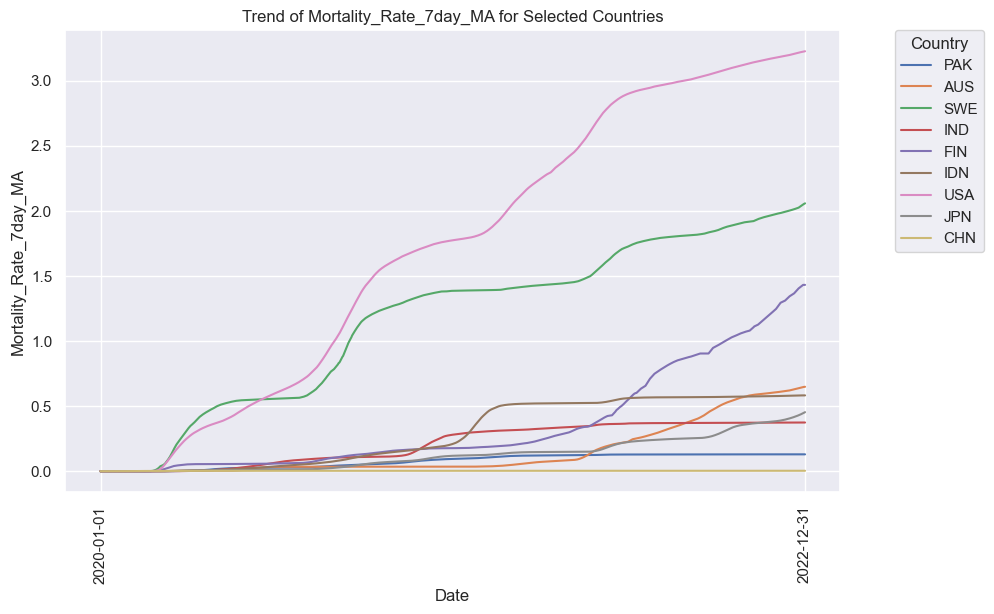

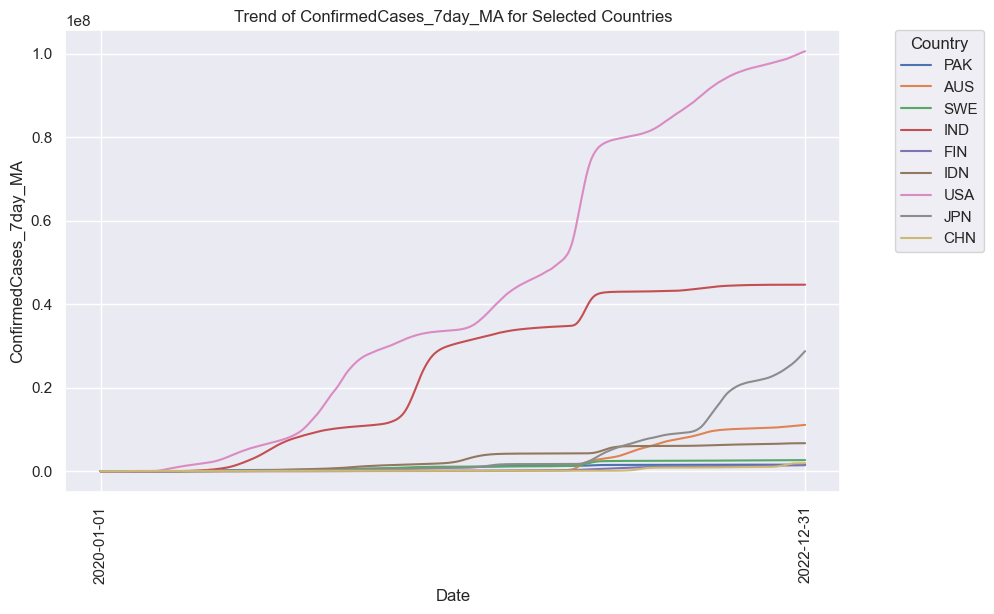

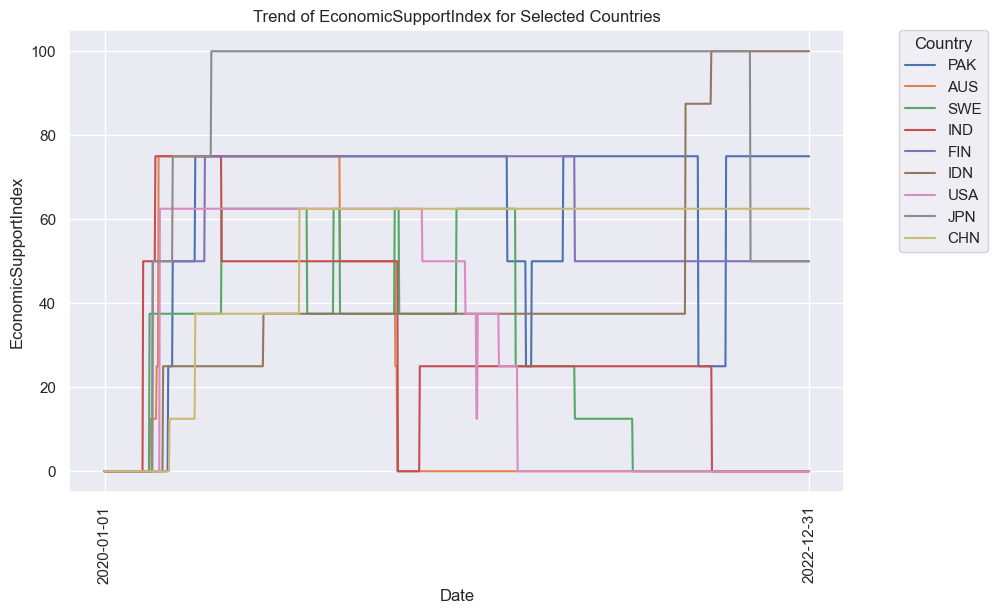

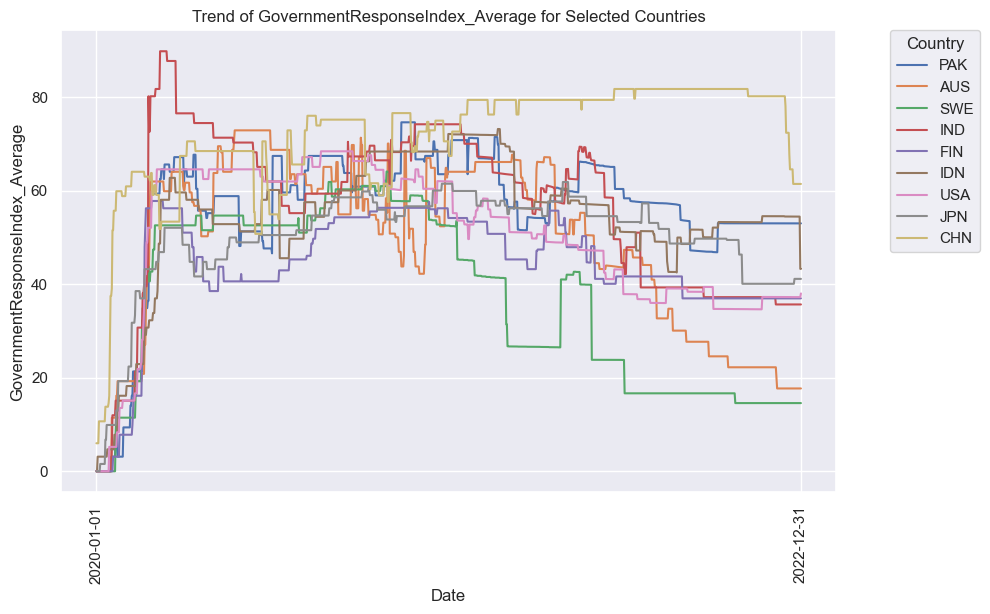

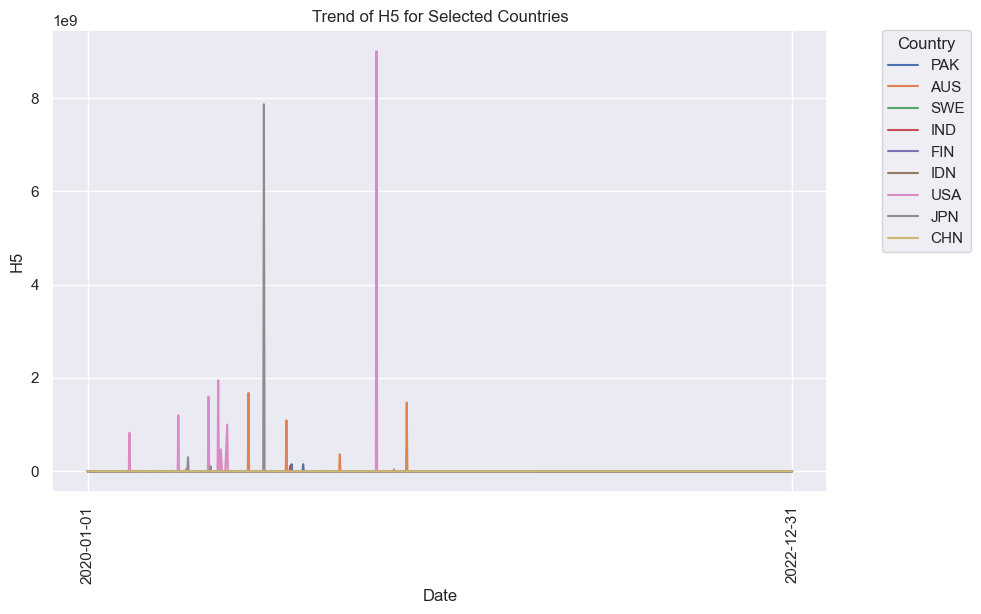

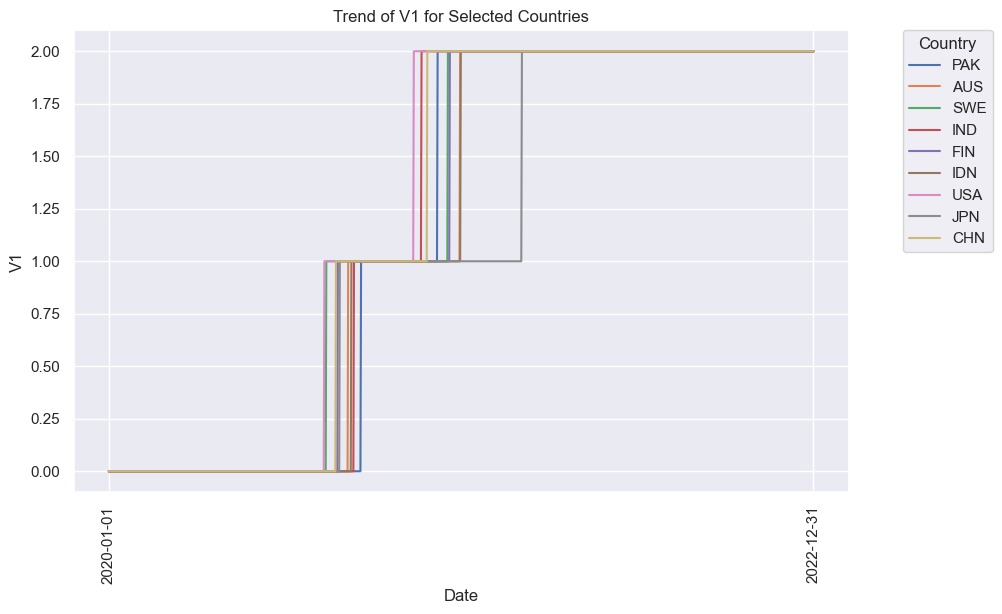

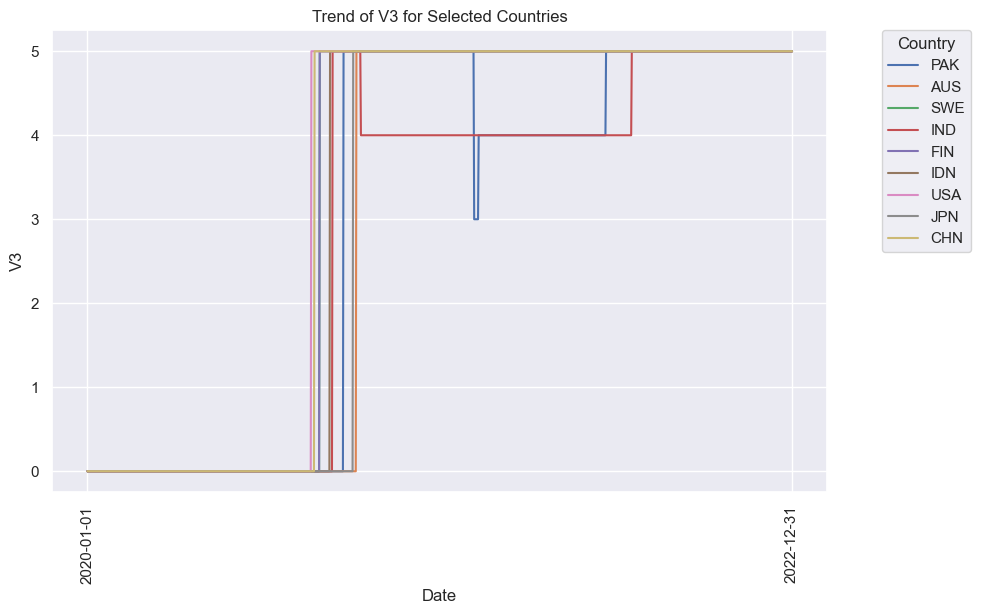

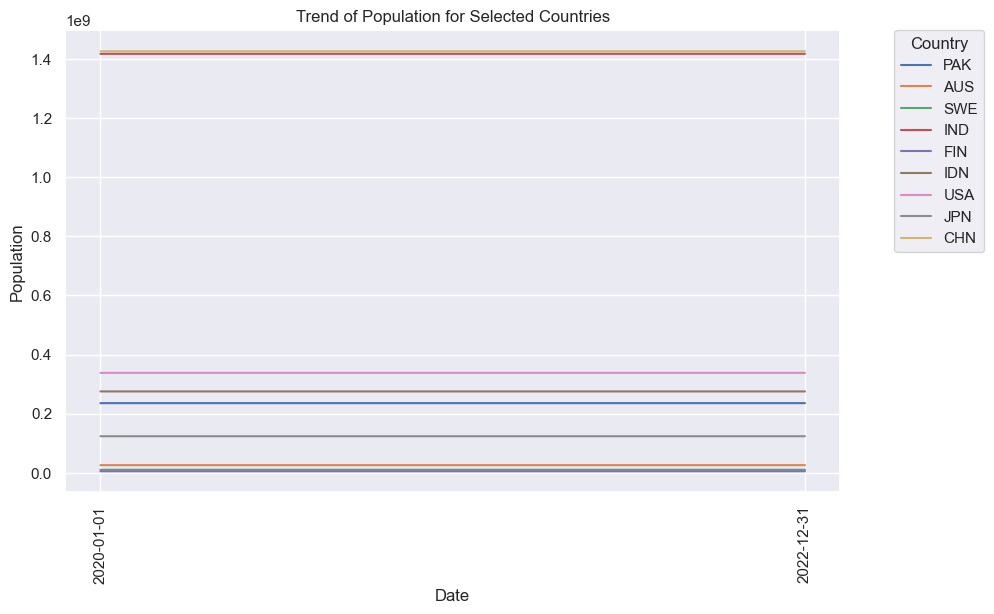

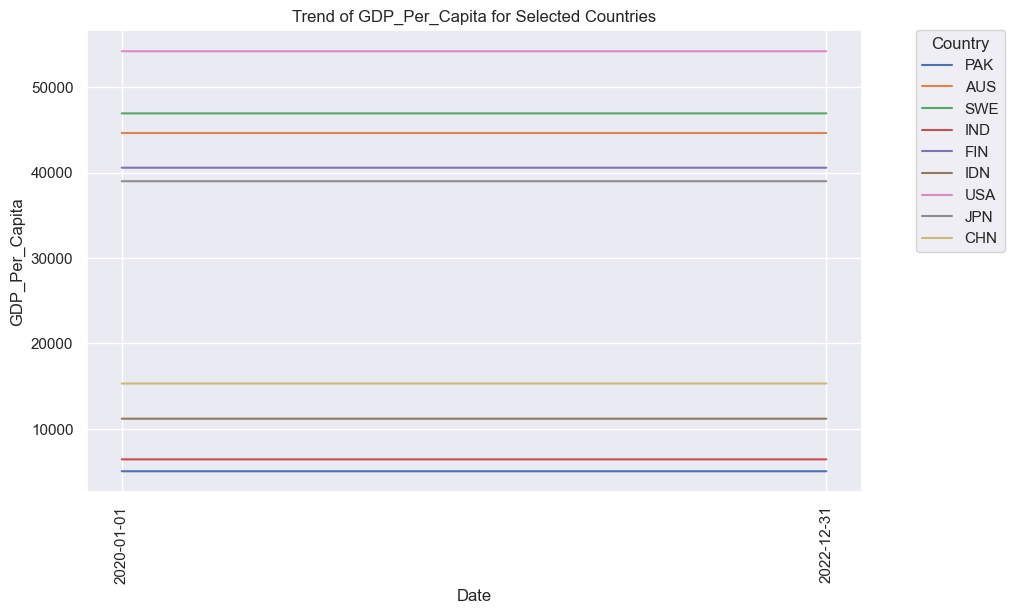

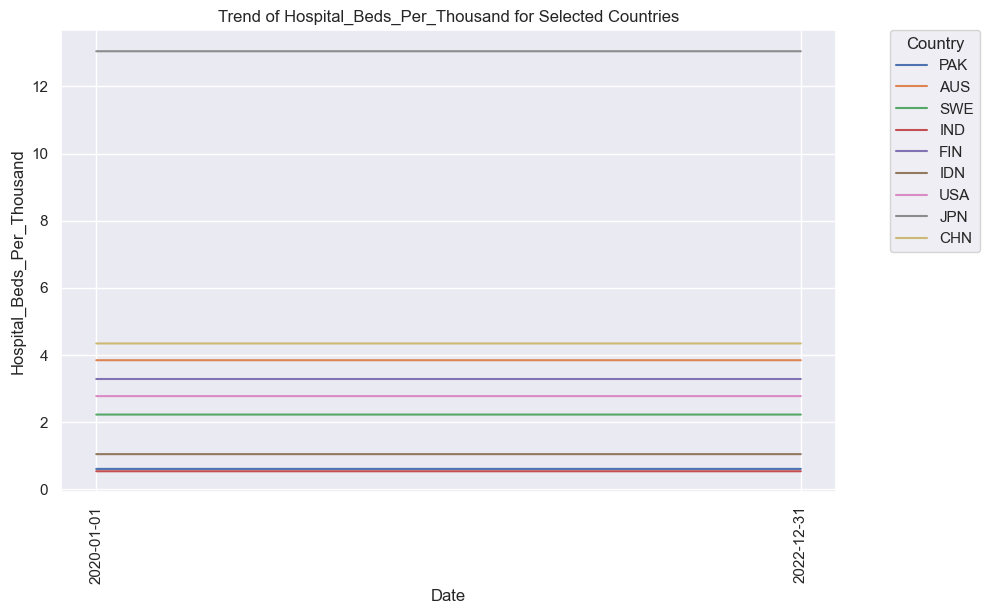

In [155]:
selectedColumns = ['Mortality_Rate_7day_MA', 'ConfirmedCases_7day_MA', 'EconomicSupportIndex','GovernmentResponseIndex_Average', 'H5',
       'V1', 'V3', 'Population', 'GDP_Per_Capita', 'Hospital_Beds_Per_Thousand']

start_date = justViewing['Date'].min()
end_date = justViewing['Date'].max()

for column in selectedColumns:
    plt.figure(figsize=(10, 6)) 
    sns.lineplot(data=justViewing, x='Date', y=column, hue='CountryCode')
    plt.title(f'Trend of {column} for Selected Countries')
    plt.xlabel('Date')
    plt.xticks([start_date, end_date],rotation=90)
    plt.legend(title='Country',loc='upper left', bbox_to_anchor=(1.07, 1), borderaxespad=0.)
    plt.show()

####  Creating New Features

In [170]:
justViewing = justViewing.sort_values(by=['CountryCode', 'Date'])
justViewing['changeInCC'] = justViewing.groupby(['CountryCode'])['ConfirmedCases'].transform(lambda x: x.diff())
justViewing['changeInMR'] = justViewing.groupby(['CountryCode'])['Mortality Rate'].transform(lambda x: x.diff())
justViewing = justViewing.replace(np.nan, 0)

justViewing['ChangeCC_7dayMA'] = justViewing.groupby(['CountryCode'])['changeInCC'].rolling(window=7, min_periods=1).mean().reset_index(0, drop=True)
justViewing['ChangeMR_7dayMA'] = justViewing.groupby(['CountryCode'])['changeInMR'].rolling(window=7, min_periods=1).mean().reset_index(0, drop=True)

justViewing.head(1)


CountryCode        Date  ConfirmedCases  ConfirmedDeaths  \
44         AUS  2020-01-01             0.0              0.0   

   MajorityVaccinated  StringencyIndex_Average  \
44                 NV                      0.0   

    GovernmentResponseIndex_Average  ContainmentHealthIndex_Average  \
44                              0.0                             0.0   

    EconomicSupportIndex  Population  GDP_Per_Capita  Life_Expectancy  \
44                   0.0  26177410.0        44648.71            83.44   

    Hospital_Beds_Per_Thousand  Mortality Rate   H5  V1  V3  \
44                        3.84             0.0  0.0   0   0   

    Mortality_Rate_7day_MA  ConfirmedCases_7day_MA  changeInCC  changeInMR  \
44                     0.0                     0.0         0.0         0.0   

    ChangeCC_7dayMA  ChangeMR_7dayMA  
44              0.0              0.0

In [171]:
justViewing['ChangeMR_14dayMA'] = justViewing.groupby(['CountryCode'])['changeInMR'].rolling(window=14, min_periods=1).mean().reset_index(0, drop=True)

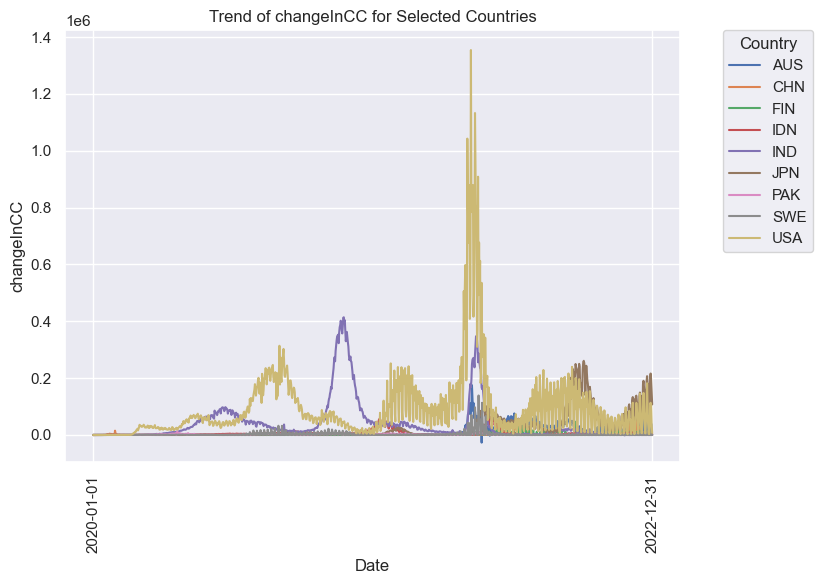

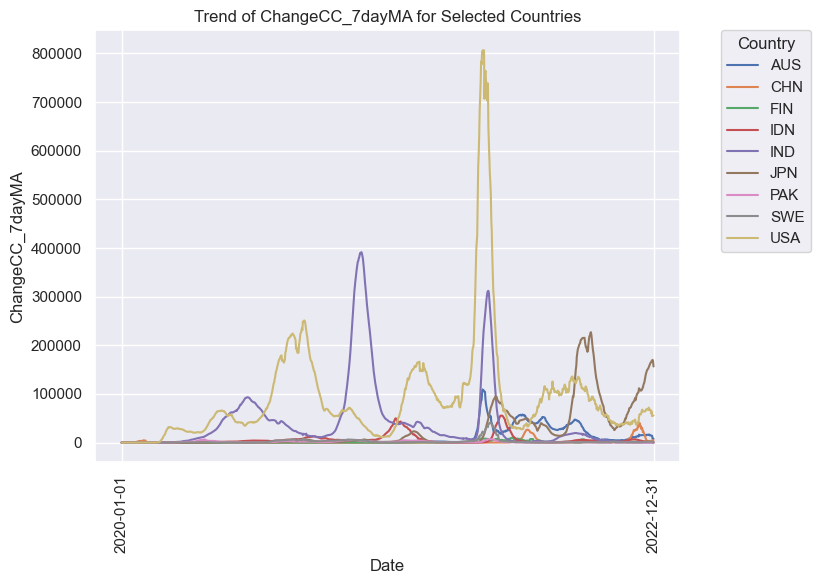

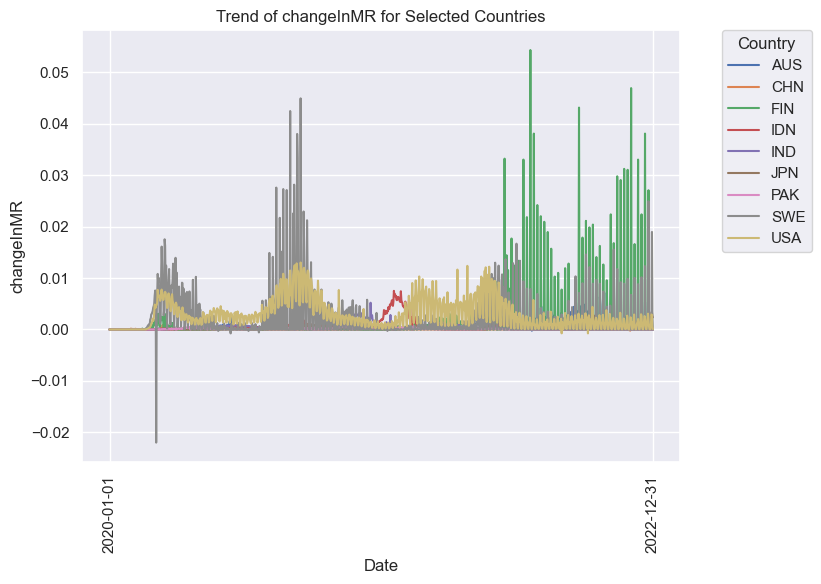

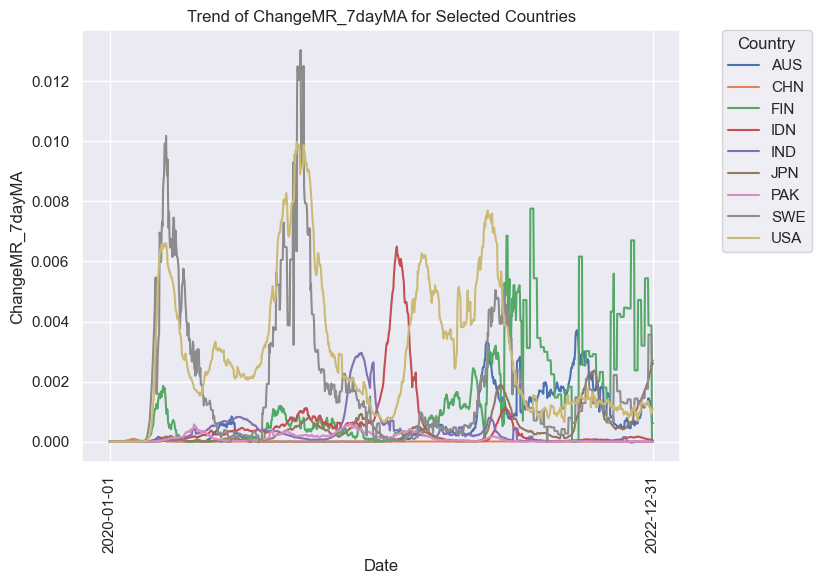

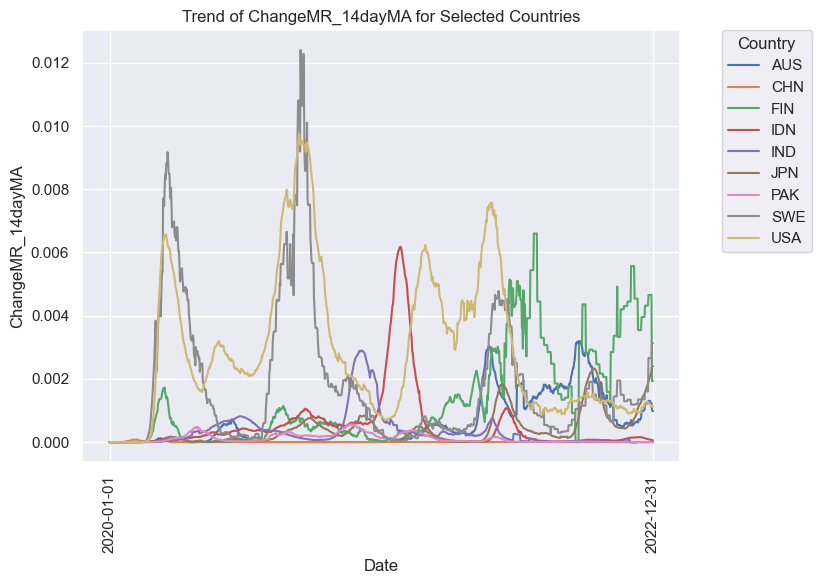

In [158]:
selectedColumns = ['changeInCC', 'ChangeCC_7dayMA','changeInMR','ChangeMR_7dayMA', 'ChangeMR_14dayMA']
start_date = justViewing['Date'].min()
end_date = justViewing['Date'].max()


for column in selectedColumns:
    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.lineplot(data=justViewing, x='Date', y=column, hue='CountryCode')
    plt.title(f'Trend of {column} for Selected Countries')
    plt.xlabel('Date')
    plt.xticks([start_date, end_date],rotation=90)
    plt.legend(title='Country',loc='upper left', bbox_to_anchor=(1.07, 1), borderaxespad=0.)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

In [159]:
justViewing[justViewing['CountryCode'] == 'CHN']['ConfirmedCases']

126             0.0
261             0.0
300             0.0
450             0.0
732             0.0
            ...    
163664    1933112.0
163867    1938214.0
164071    1943729.0
164163    1950933.0
164313    1956071.0
Name: ConfirmedCases, Length: 1096, dtype: float64

In [160]:
justViewing.head()

CountryCode        Date  ConfirmedCases  ConfirmedDeaths  \
44          AUS  2020-01-01             0.0              0.0   
254         AUS  2020-01-02             0.0              0.0   
378         AUS  2020-01-03             0.0              0.0   
550         AUS  2020-01-04             0.0              0.0   
677         AUS  2020-01-05             0.0              0.0   

    MajorityVaccinated  StringencyIndex_Average  \
44                  NV                      0.0   
254                 NV                      0.0   
378                 NV                      0.0   
550                 NV                      0.0   
677                 NV                      0.0   

     GovernmentResponseIndex_Average  ContainmentHealthIndex_Average  \
44                               0.0                             0.0   
254                              0.0                             0.0   
378                              0.0                             0.0   
550                              0.0                             0.0   
677                              0.0                             0.0   

     EconomicSupportIndex  Population  GDP_Per_Capita  Life_Expectancy  \
44                    0.0  26177410.0        44648.71            83.44   
254                   0.0  26177410.0        44648.71            83.44   
378                   0.0  26177410.0        44648.71            83.44   
550                   0.0  26177410.0        44648.71            83.44   
677                   0.0  26177410.0        44648.71            83.44   

     Hospital_Beds_Per_Thousand  Mortality Rate   H5  V1  V3  \
44                         3.84             0.0  0.0   0   0   
254                        3.84             0.0  0.0   0   0   
378                        3.84             0.0  0.0   0   0   
550                        3.84             0.0  0.0   0   0   
677                        3.84             0.0  0.0   0   0   

     Mortality_Rate_7day_MA  ConfirmedCases_7day_MA  changeInCC  changeInMR  \
44                      0.0                     0.0         0.0         0.0   
254                     0.0                     0.0         0.0         0.0   
378                     0.0                     0.0         0.0         0.0   
550                     0.0                     0.0         0.0         0.0   
677                     0.0                     0.0         0.0         0.0   

     ChangeCC_7dayMA  ChangeMR_7dayMA  ChangeMR_14dayMA  
44               0.0              0.0               0.0  
254              0.0              0.0               0.0  
378              0.0              0.0               0.0  
550              0.0              0.0               0.0  
677              0.0              0.0               0.0

In [161]:
justViewing[justViewing['CountryCode'] == 'GER']['Date']

Series([], Name: Date, dtype: object)

#### Daily Change in ConfirmedCases

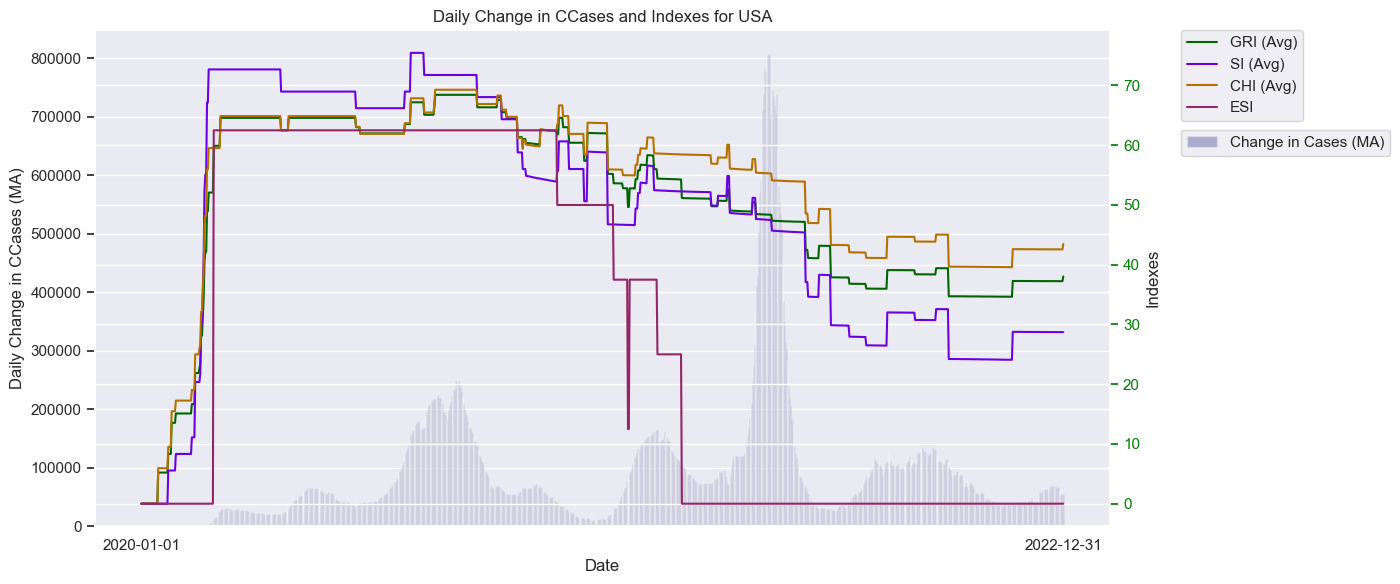

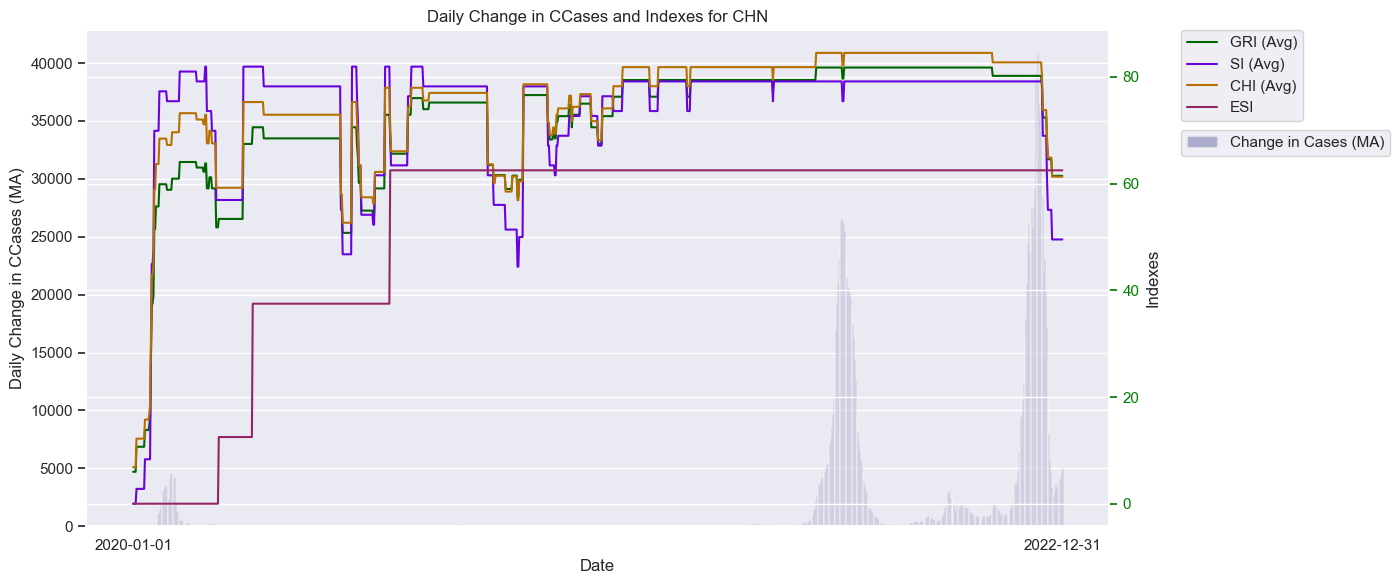

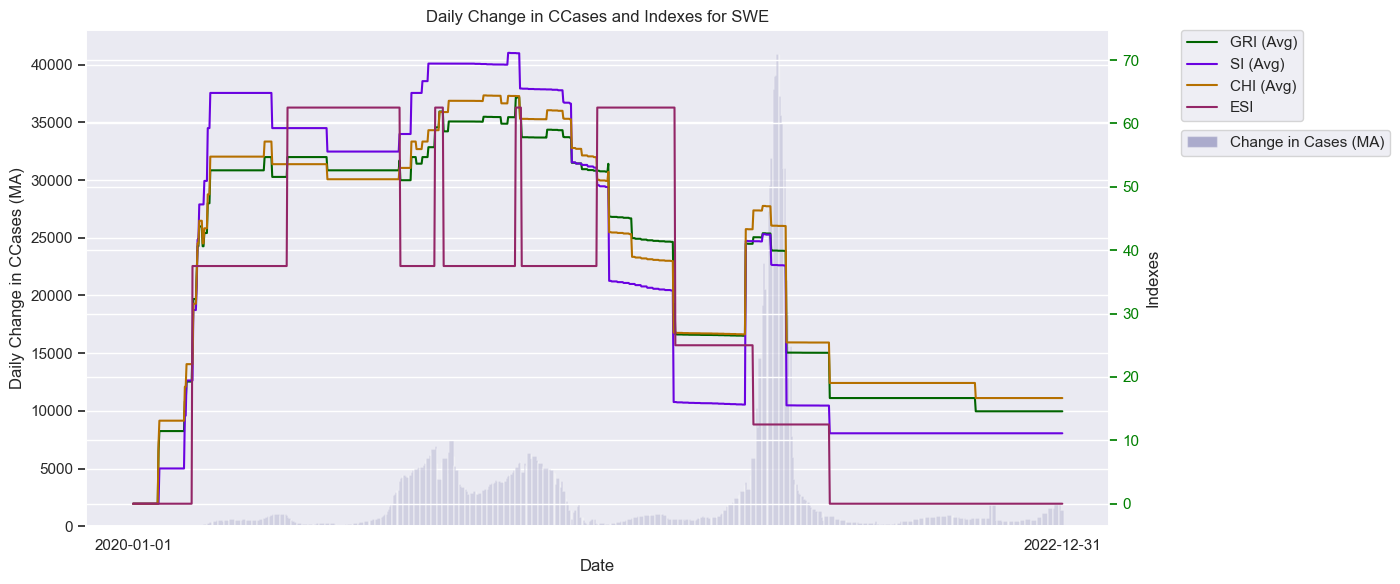

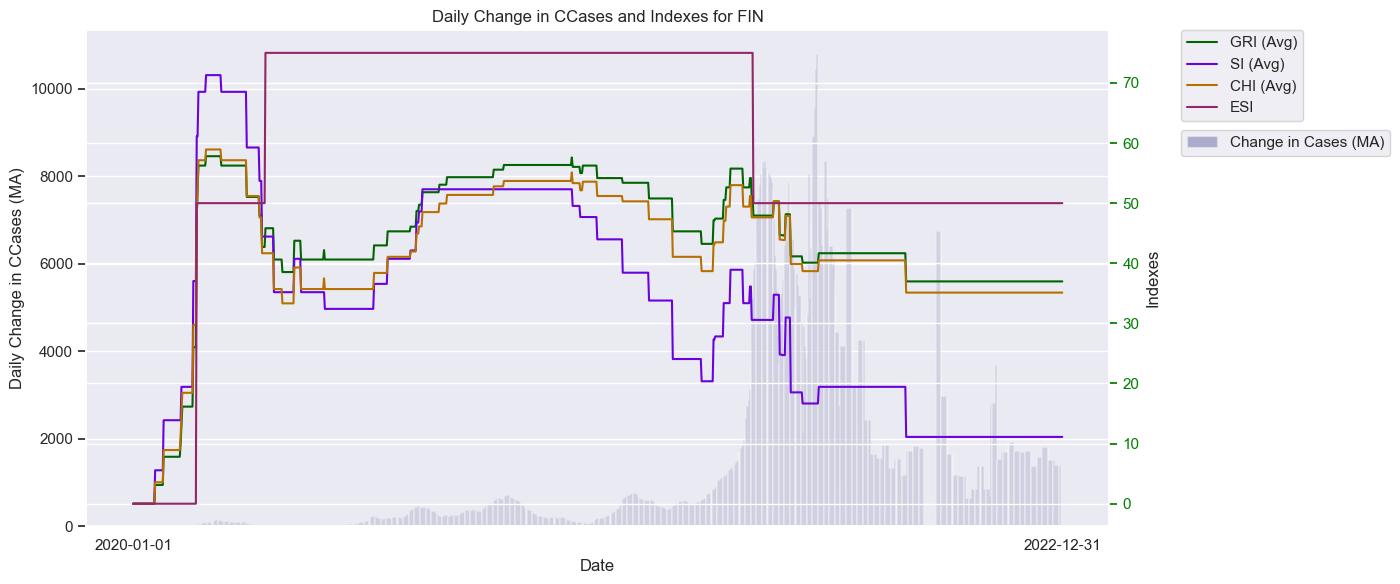

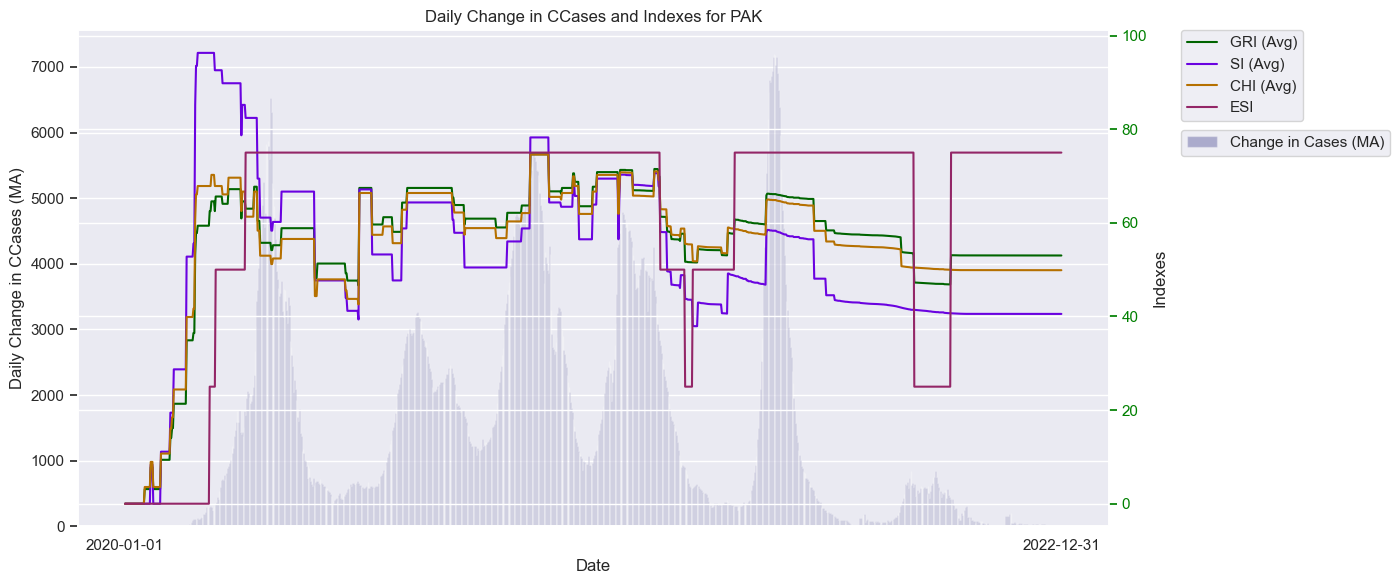

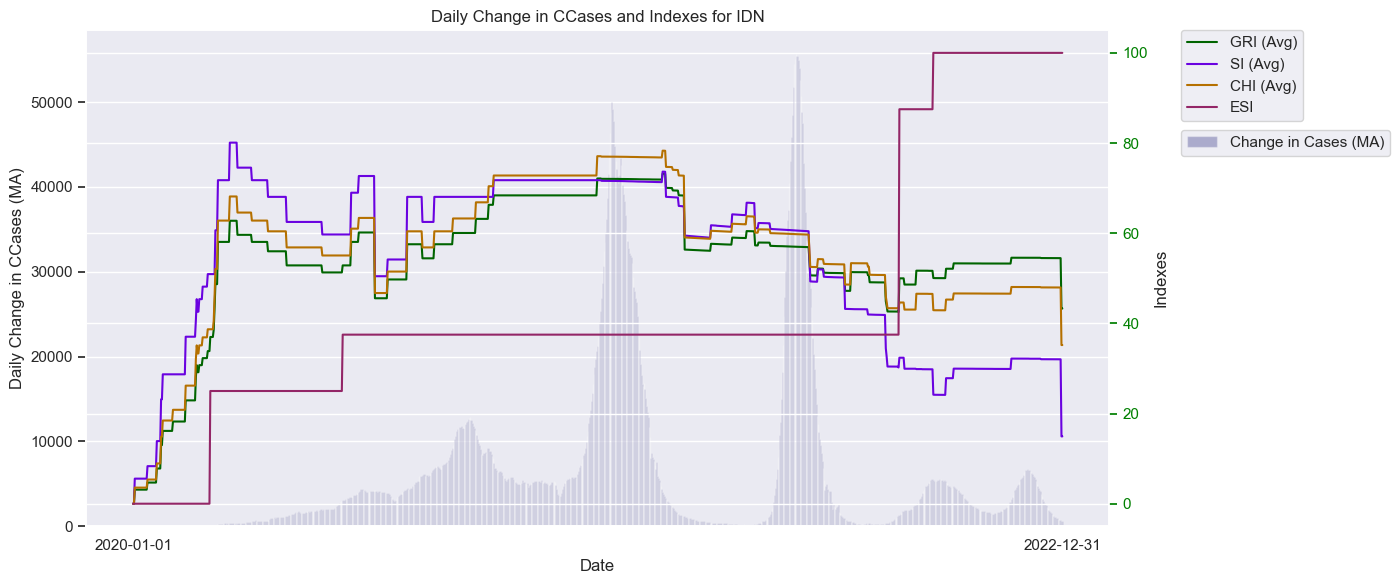

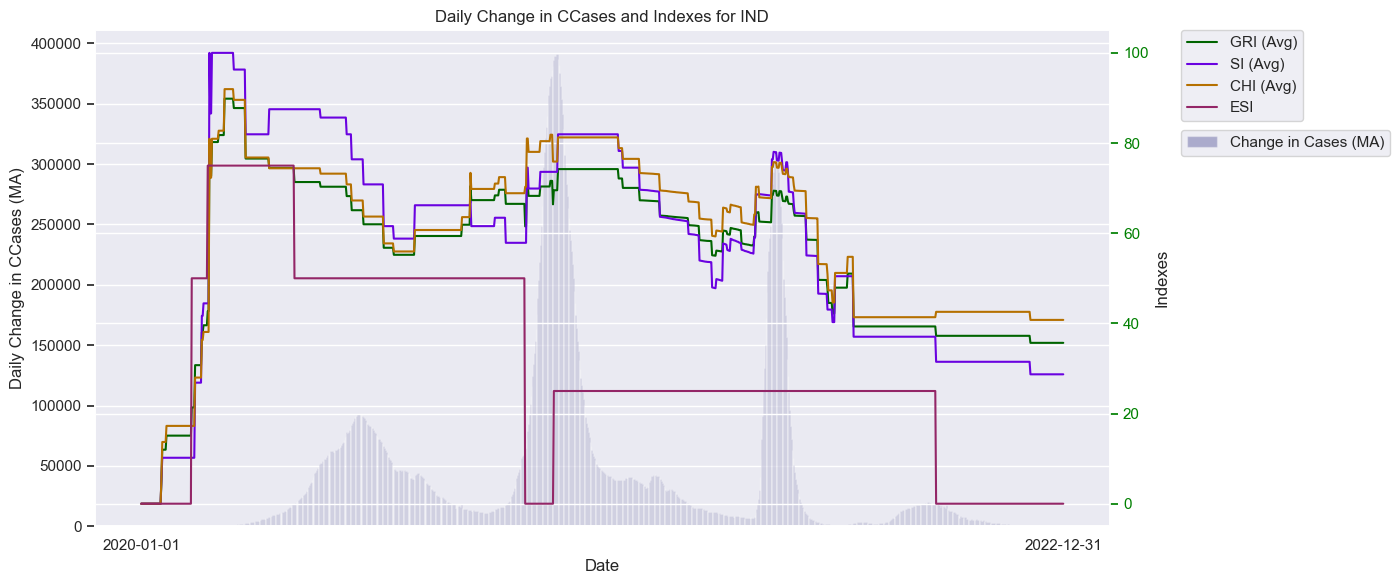

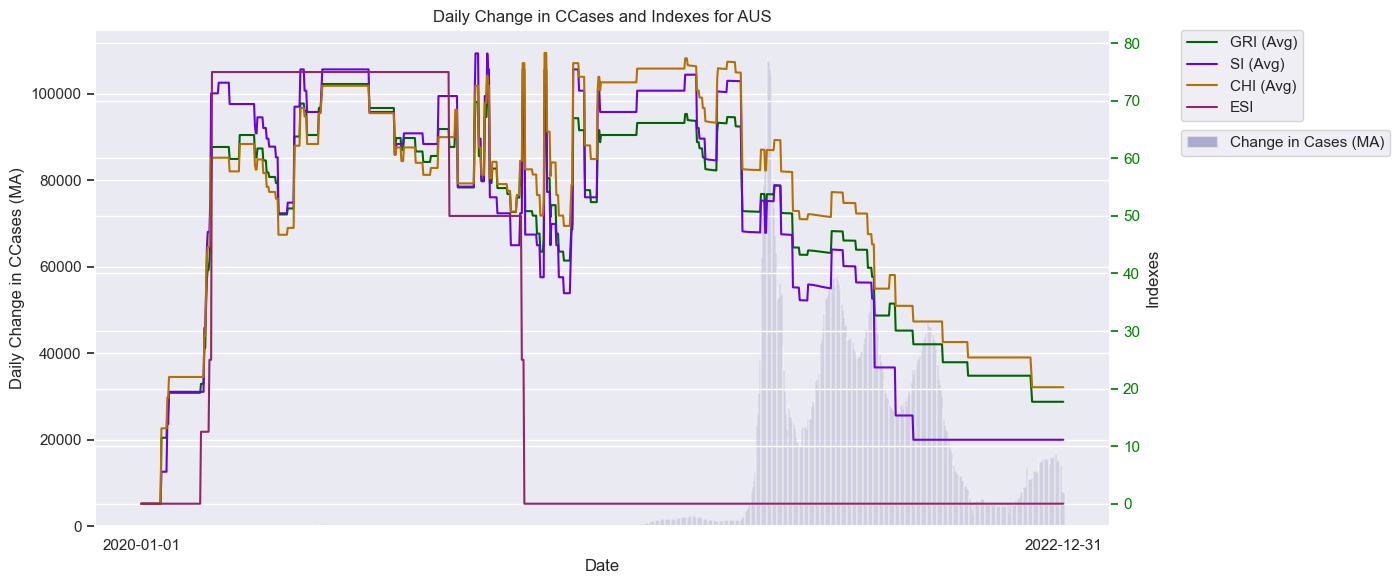

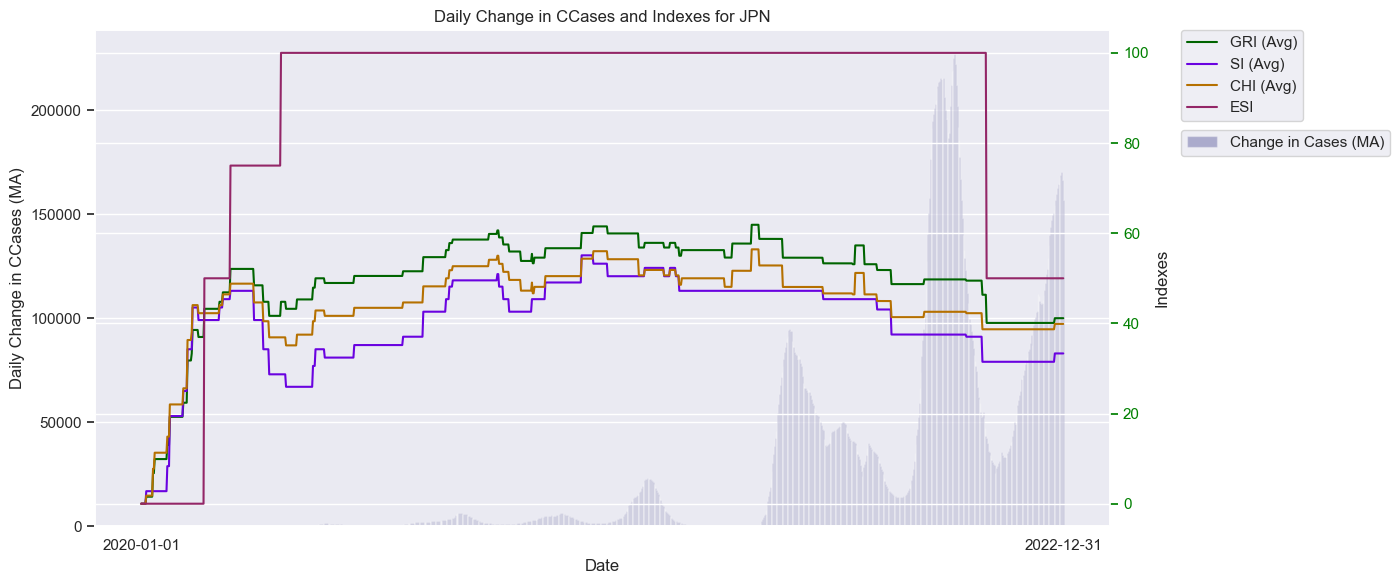

In [162]:
start_date = justViewing['Date'].min()
end_date = justViewing['Date'].max()

for idx, country in enumerate(countries):
    
    plt.figure(figsize=(14, 6))

    data = justViewing[justViewing['CountryCode'] == country].sort_values(by='Date')

    ax1 = sns.barplot(x='Date', y='ChangeCC_7dayMA', data=data, color='#040080',zorder=1,alpha=0.3,label='Change in Cases (MA)') 
    ax1.set_ylabel('Daily Change in CCases (MA)')
    ax1.set_title(f'Daily Change in CCases and Indexes for {country}')
    ax1.tick_params(axis='y', colors='#292929')

    ax2 = ax1.twinx()
    sns.lineplot(x='Date', y='GovernmentResponseIndex_Average', data=data, ax=ax2, color='darkgreen', label='GRI (Avg)')
    sns.lineplot(x='Date', y='StringencyIndex_Average', data=data, ax=ax2, color='#6a02e0', label='SI (Avg)')
    sns.lineplot(x='Date', y='ContainmentHealthIndex_Average', data=data, ax=ax2, color='#b57000', label='CHI (Avg)')
    sns.lineplot(x='Date', y='EconomicSupportIndex', data=data, ax=ax2, color='#932667', label='ESI')
    ax2.set_ylabel('Indexes')
    ax2.tick_params(axis='y', colors='green')
   
    ax1.legend(loc='upper left', bbox_to_anchor=(1.07, 0.8), borderaxespad=0.)
    ax2.legend(loc='upper left', bbox_to_anchor=(1.07, 1), borderaxespad=0.)
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    plt.xticks([start_date, end_date])
    plt.tight_layout()
    plt.show()

#### Daily Change in Mortality Rate

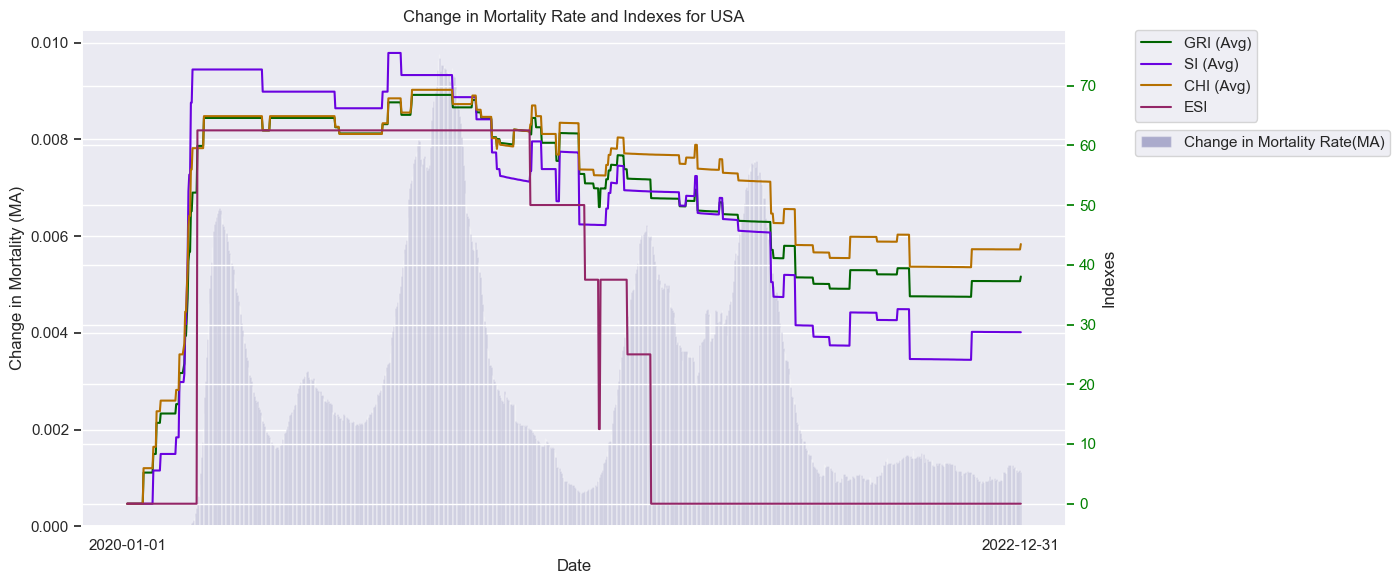

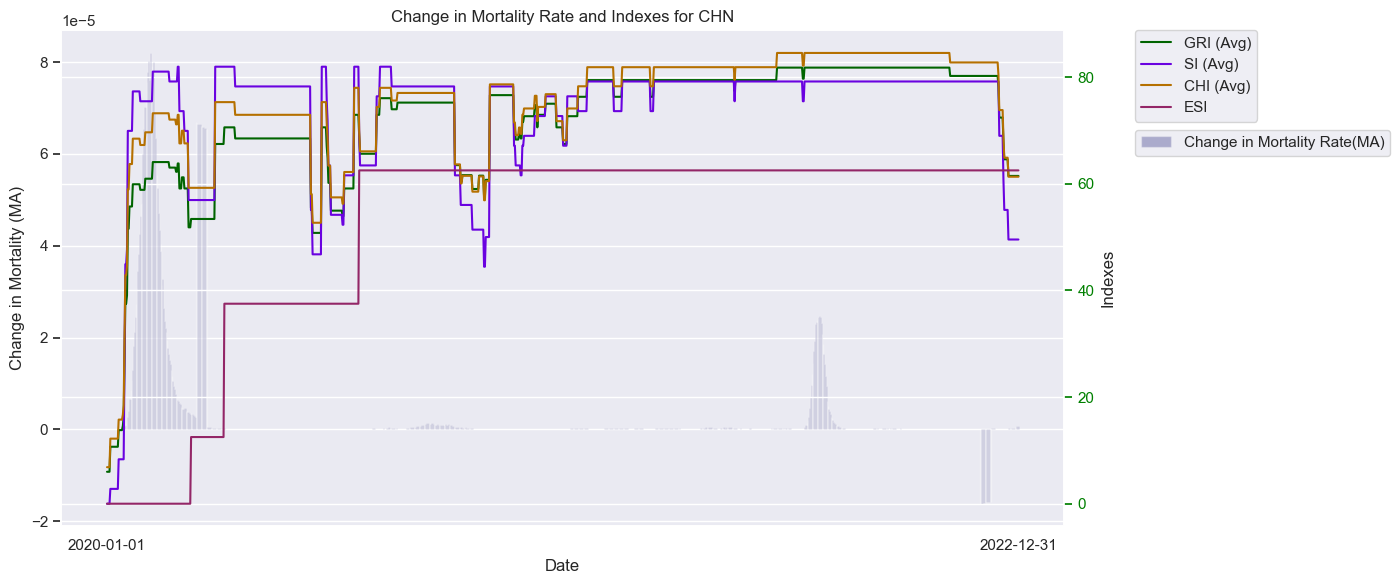

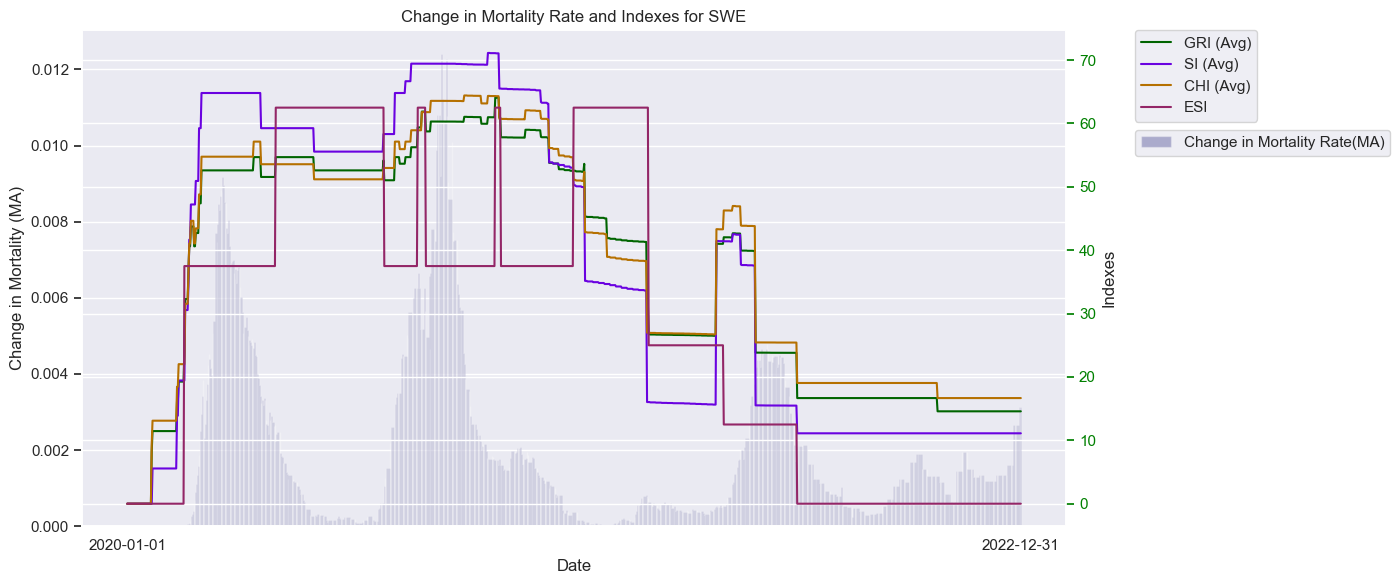

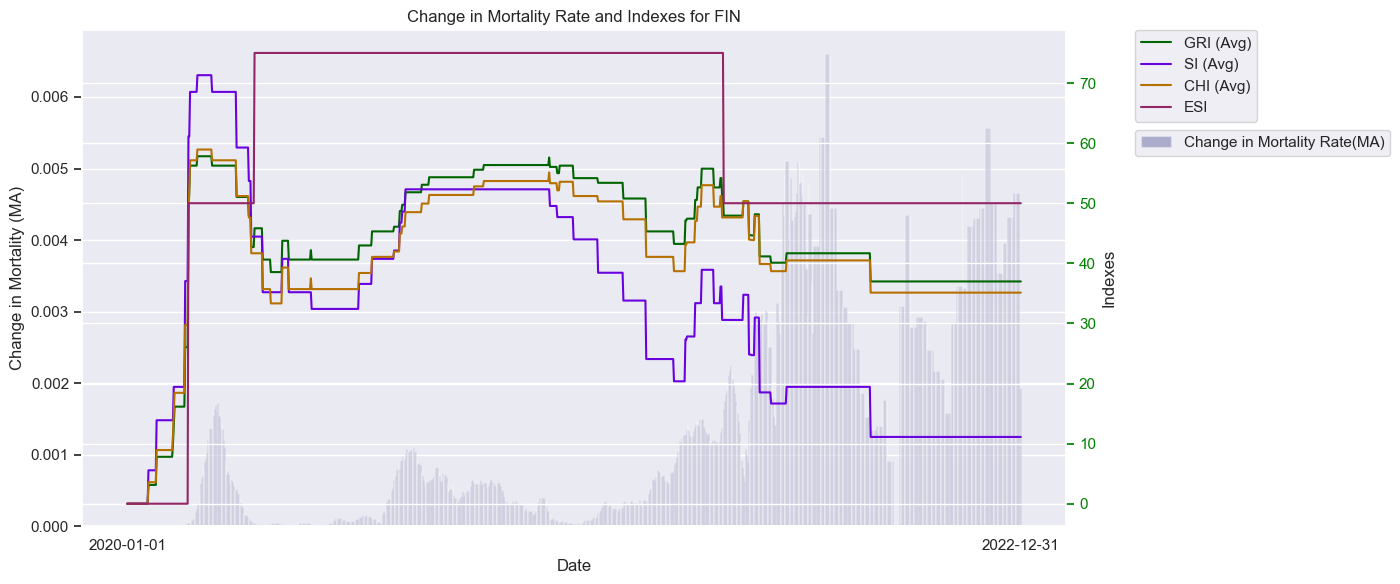

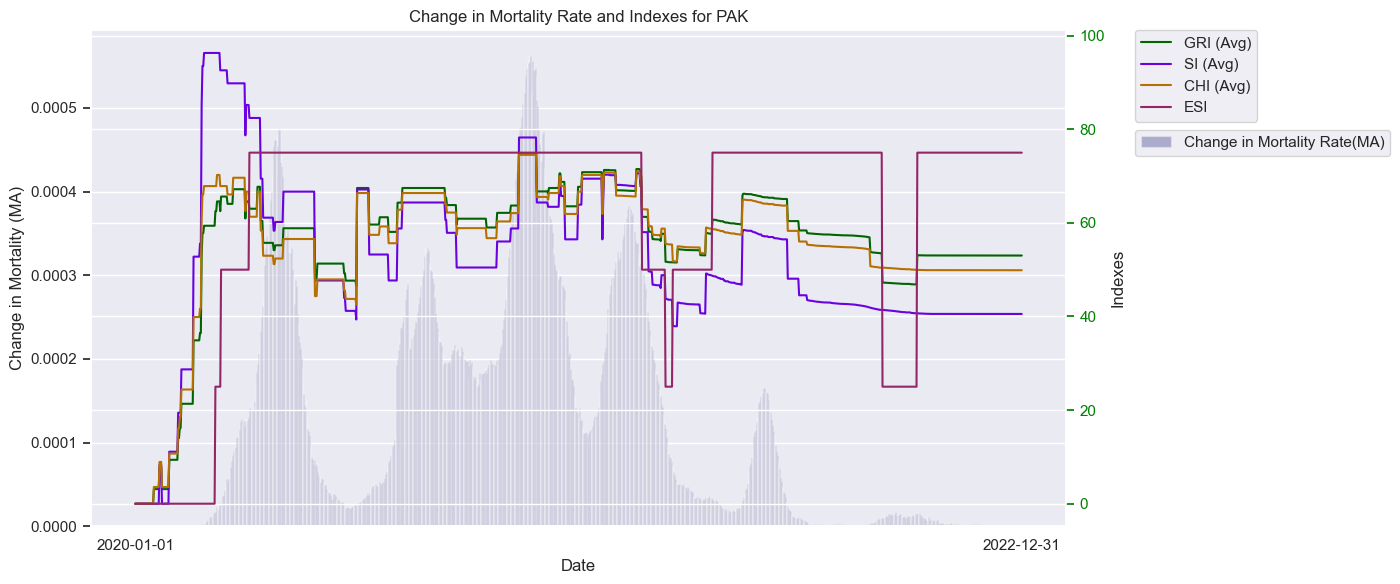

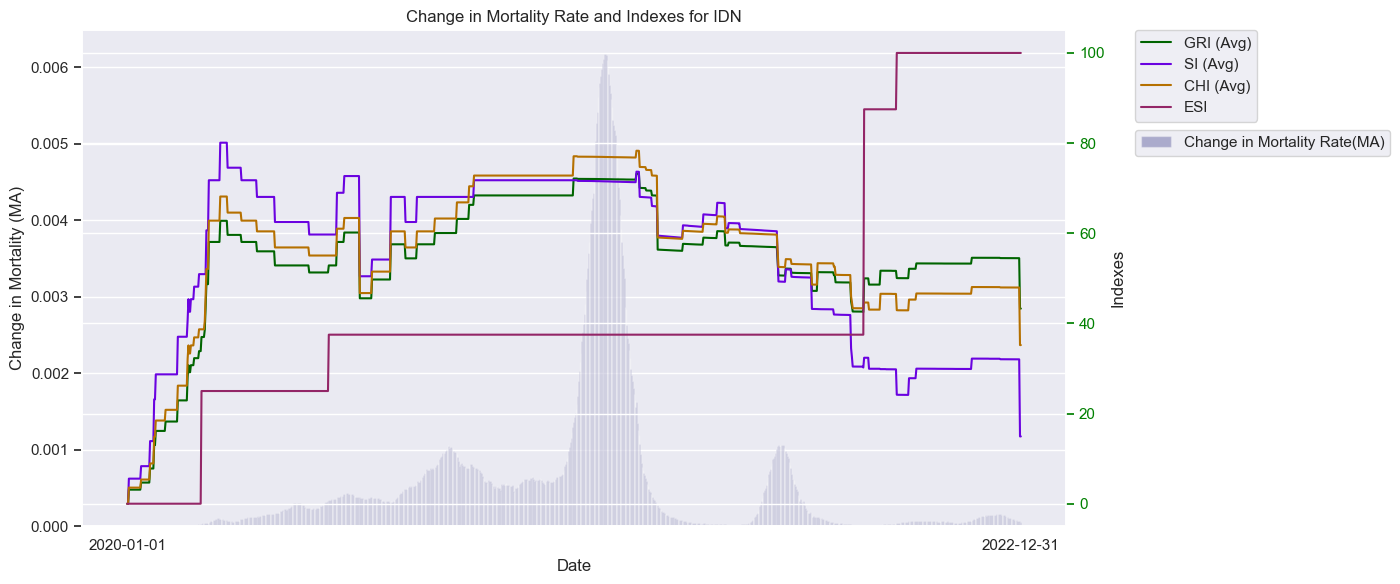

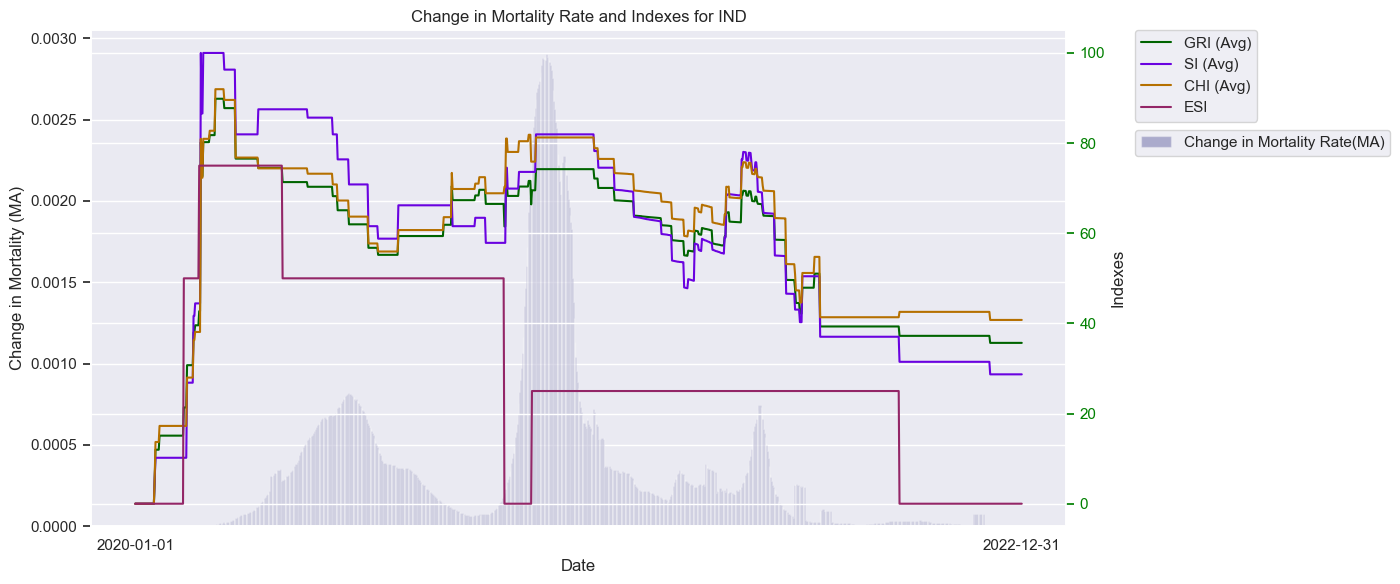

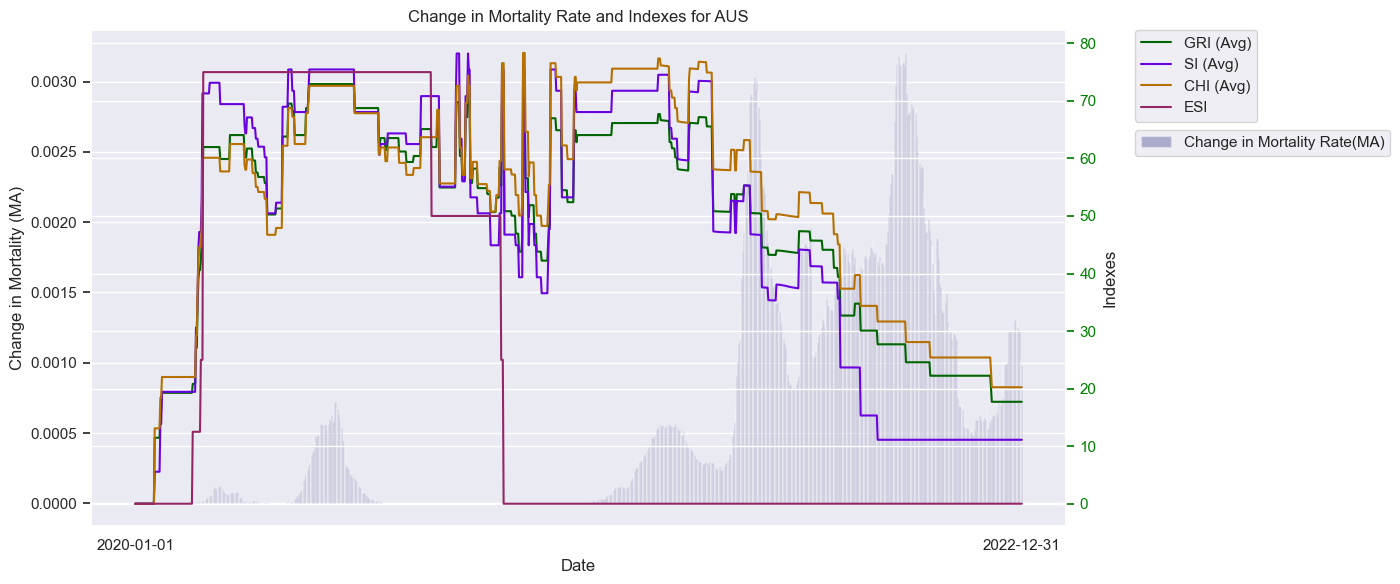

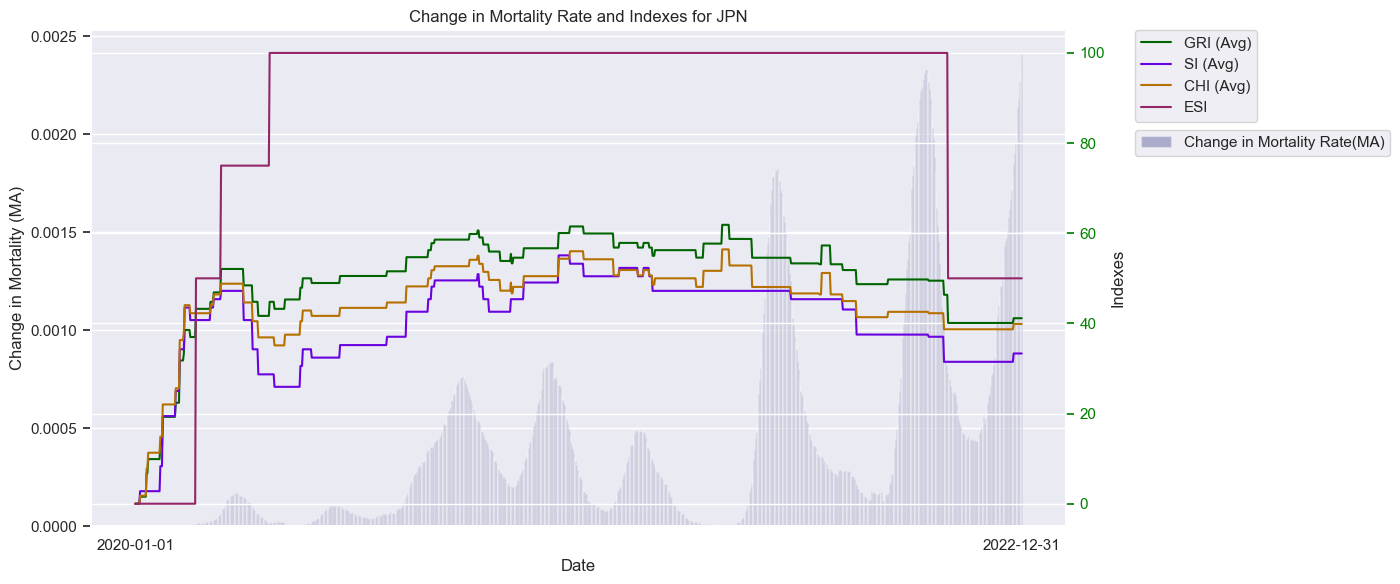

In [163]:
start_date = justViewing['Date'].min()
end_date = justViewing['Date'].max()

for idx, country in enumerate(countries):
    
    plt.figure(figsize=(14, 6))

    data = justViewing[justViewing['CountryCode'] == country].sort_values(by='Date')

    ax1 = sns.barplot(x='Date', y='ChangeMR_14dayMA', data=data, color='#040080',zorder=1,alpha=0.3,label='Change in Mortality Rate(MA)') 
    ax1.set_ylabel('Change in Mortality (MA)')
    ax1.set_title(f'Change in Mortality Rate and Indexes for {country}')
    ax1.tick_params(axis='y', colors='#292929')

    ax2 = ax1.twinx()
    sns.lineplot(x='Date', y='GovernmentResponseIndex_Average', data=data, ax=ax2, color='darkgreen', label='GRI (Avg)')
    sns.lineplot(x='Date', y='StringencyIndex_Average', data=data, ax=ax2, color='#6a02e0', label='SI (Avg)')
    sns.lineplot(x='Date', y='ContainmentHealthIndex_Average', data=data, ax=ax2, color='#b57000', label='CHI (Avg)')
    sns.lineplot(x='Date', y='EconomicSupportIndex', data=data, ax=ax2, color='#932667', label='ESI')
    ax2.set_ylabel('Indexes')
    ax2.tick_params(axis='y', colors='green')
   
    ax1.legend(loc='upper left', bbox_to_anchor=(1.07, 0.8), borderaxespad=0.)
    ax2.legend(loc='upper left', bbox_to_anchor=(1.07, 1), borderaxespad=0.)
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    plt.xticks([start_date, end_date])
    plt.tight_layout()
    plt.show()

#### Lagged Features

In [183]:
justViewing = justViewing.sort_values(by=['CountryCode', 'Date'])

def create_lagged_features(justViewing, columns, days):
    df_lagged = justViewing.copy()
    for day in days:
        for col in columns:
            df_lagged[col + f'_Lag{day}'] = justViewing.groupby('CountryCode')[col].shift(day)
    return df_lagged


columns = ['StringencyIndex_Average', 'GovernmentResponseIndex_Average', 
                 'ContainmentHealthIndex_Average', 'EconomicSupportIndex', 'H5', 'V1', 'V3', 'MajorityVaccinated']


days = [7,14,21]

justViewingLagged = create_lagged_features(justViewing, columns, days)

In [184]:
justViewingLagged.head()

CountryCode        Date  ConfirmedCases  ConfirmedDeaths  \
44          AUS  2020-01-01             0.0              0.0   
254         AUS  2020-01-02             0.0              0.0   
378         AUS  2020-01-03             0.0              0.0   
550         AUS  2020-01-04             0.0              0.0   
677         AUS  2020-01-05             0.0              0.0   

    MajorityVaccinated  StringencyIndex_Average  \
44                  NV                      0.0   
254                 NV                      0.0   
378                 NV                      0.0   
550                 NV                      0.0   
677                 NV                      0.0   

     GovernmentResponseIndex_Average  ContainmentHealthIndex_Average  \
44                               0.0                             0.0   
254                              0.0                             0.0   
378                              0.0                             0.0   
550                              0.0                             0.0   
677                              0.0                             0.0   

     EconomicSupportIndex  Population  GDP_Per_Capita  Life_Expectancy  \
44                    0.0  26177410.0        44648.71            83.44   
254                   0.0  26177410.0        44648.71            83.44   
378                   0.0  26177410.0        44648.71            83.44   
550                   0.0  26177410.0        44648.71            83.44   
677                   0.0  26177410.0        44648.71            83.44   

     Hospital_Beds_Per_Thousand  Mortality Rate   H5  V1  V3  \
44                         3.84             0.0  0.0   0   0   
254                        3.84             0.0  0.0   0   0   
378                        3.84             0.0  0.0   0   0   
550                        3.84             0.0  0.0   0   0   
677                        3.84             0.0  0.0   0   0   

     Mortality_Rate_7day_MA  ConfirmedCases_7day_MA  changeInCC  changeInMR  \
44                      0.0                     0.0         0.0         0.0   
254                     0.0                     0.0         0.0         0.0   
378                     0.0                     0.0         0.0         0.0   
550                     0.0                     0.0         0.0         0.0   
677                     0.0                     0.0         0.0         0.0   

     ChangeCC_7dayMA  ChangeMR_7dayMA  ChangeMR_14dayMA  \
44               0.0              0.0               0.0   
254              0.0              0.0               0.0   
378              0.0              0.0               0.0   
550              0.0              0.0               0.0   
677              0.0              0.0               0.0   

     StringencyIndex_Average_Lag7  GovernmentResponseIndex_Average_Lag7  \
44                            NaN                                   NaN   
254                           NaN                                   NaN   
378                           NaN                                   NaN   
550                           NaN                                   NaN   
677                           NaN                                   NaN   

     ContainmentHealthIndex_Average_Lag7  EconomicSupportIndex_Lag7  H5_Lag7  \
44                                   NaN                        NaN      NaN   
254                                  NaN                        NaN      NaN   
378                                  NaN                        NaN      NaN   
550                                  NaN                        NaN      NaN   
677                                  NaN                        NaN      NaN   

     V1_Lag7  V3_Lag7 MajorityVaccinated_Lag7  StringencyIndex_Average_Lag14  \
44       NaN      NaN                     NaN                            NaN   
254      NaN      NaN                     NaN                            NaN   
378      NaN      NaN                     NaN  

In [181]:
justViewingLagged[justViewingLagged['CountryCode'] == 'USA']['V3_Lag7']

98        NaN
270       NaN
319       NaN
468       NaN
742       NaN
         ... 
163728    5.0
163858    5.0
164096    5.0
164116    5.0
164349    5.0
Name: V3_Lag7, Length: 1096, dtype: float64

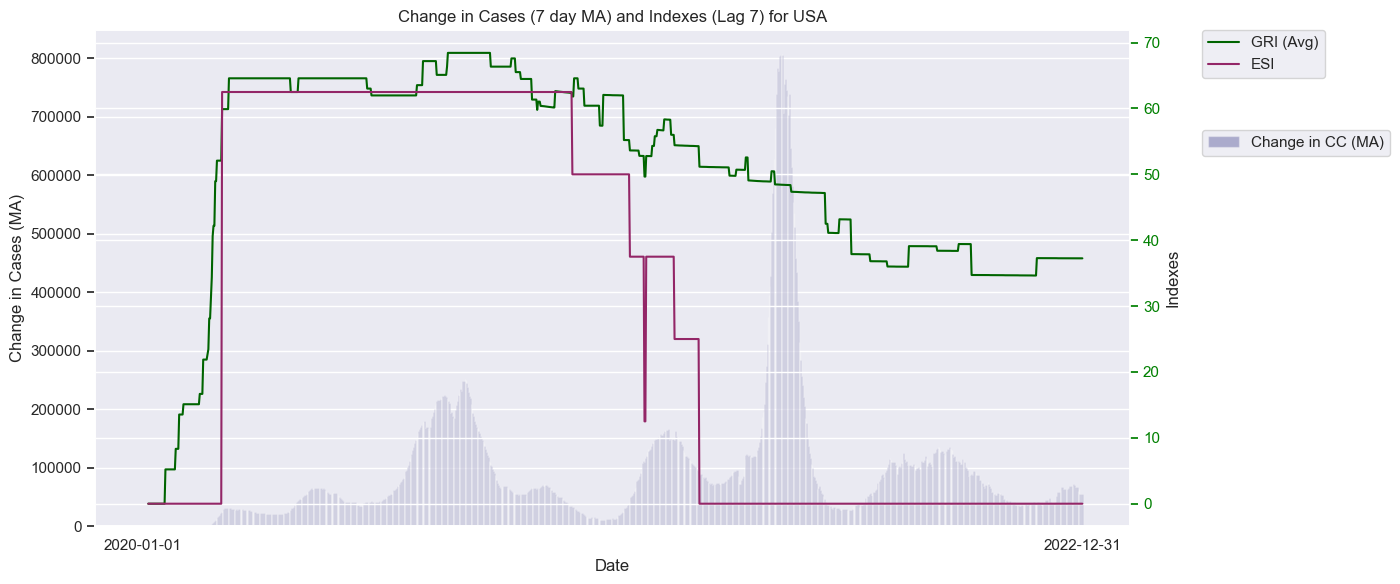

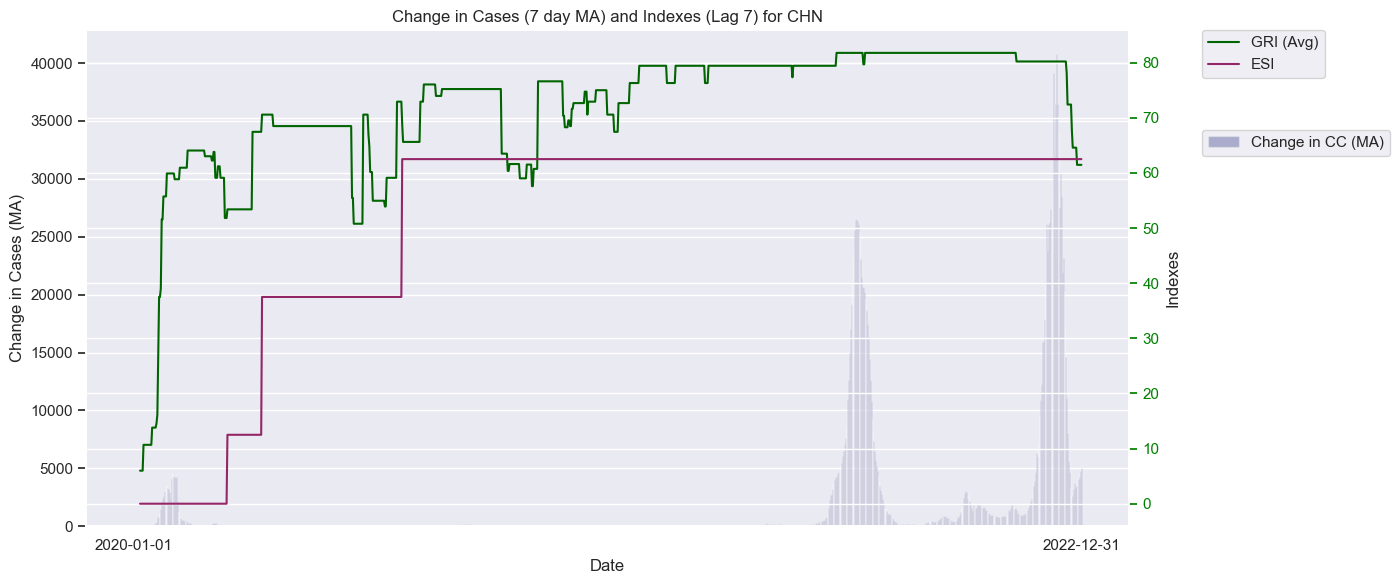

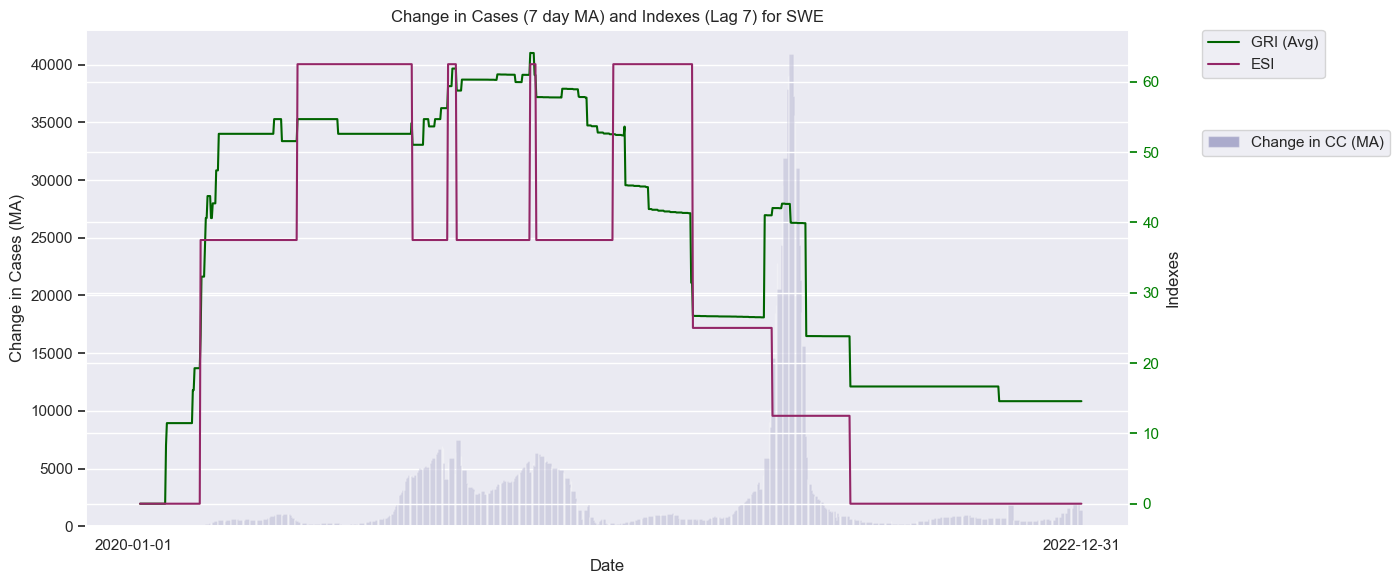

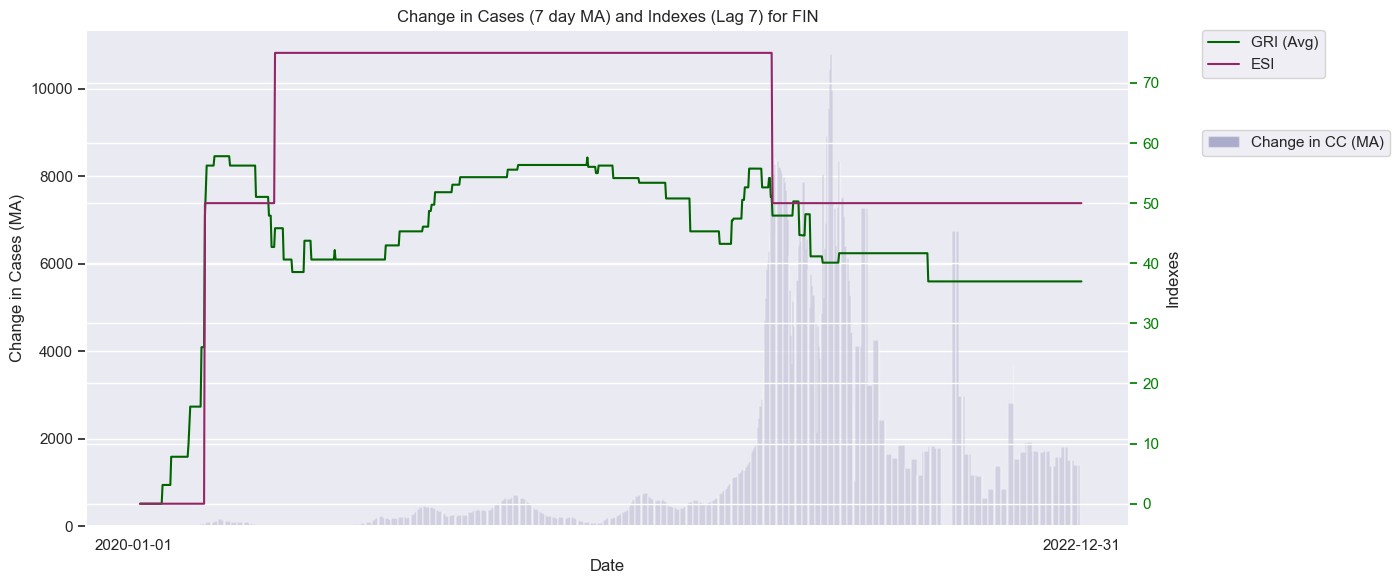

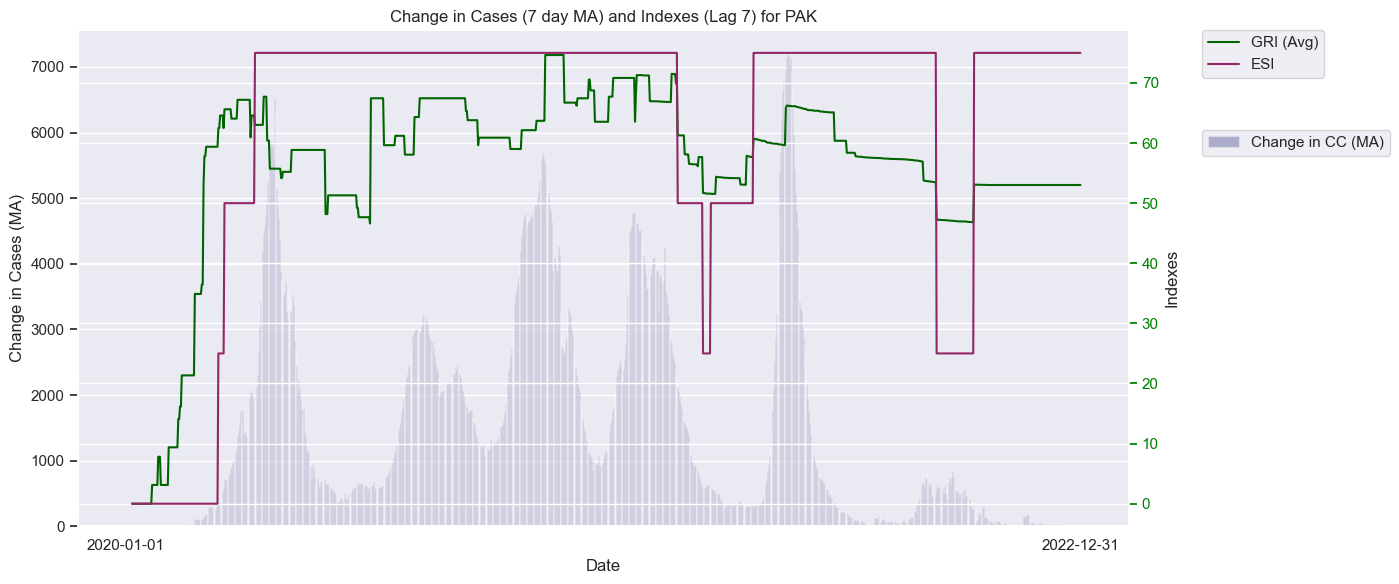

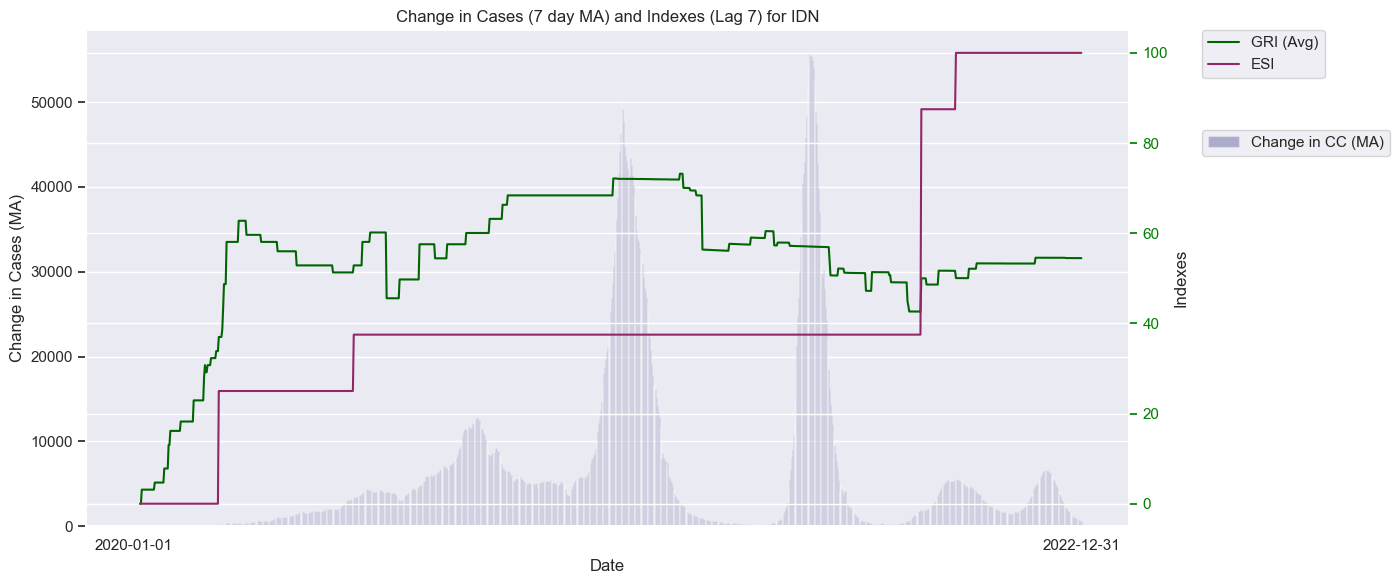

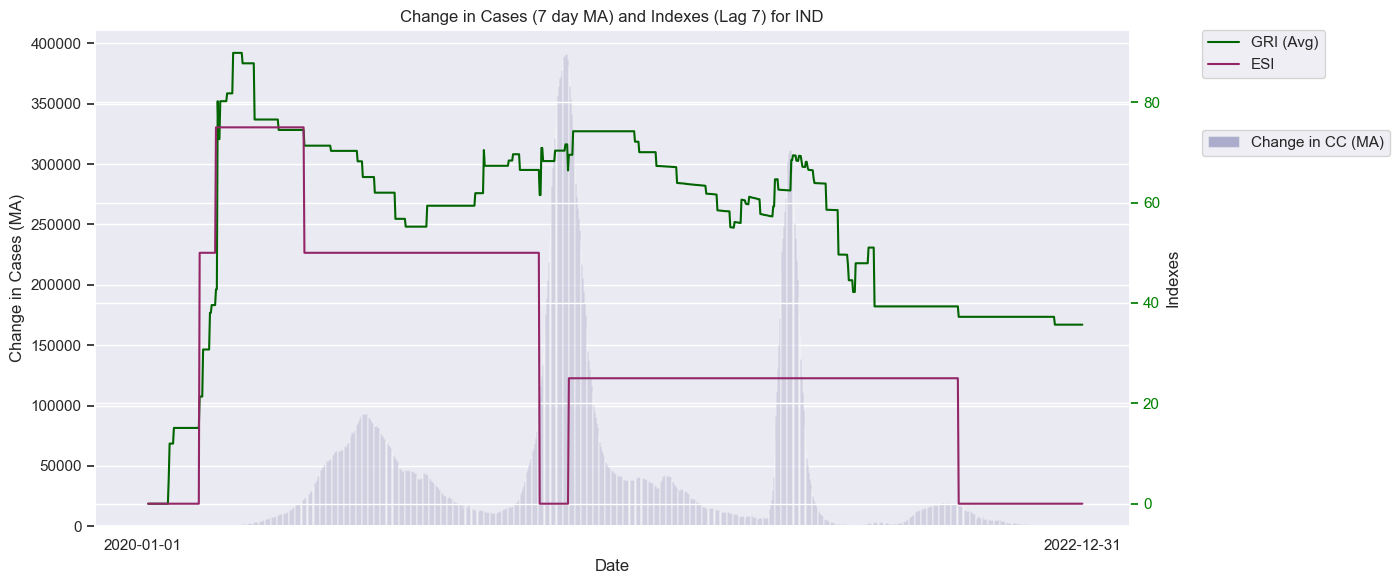

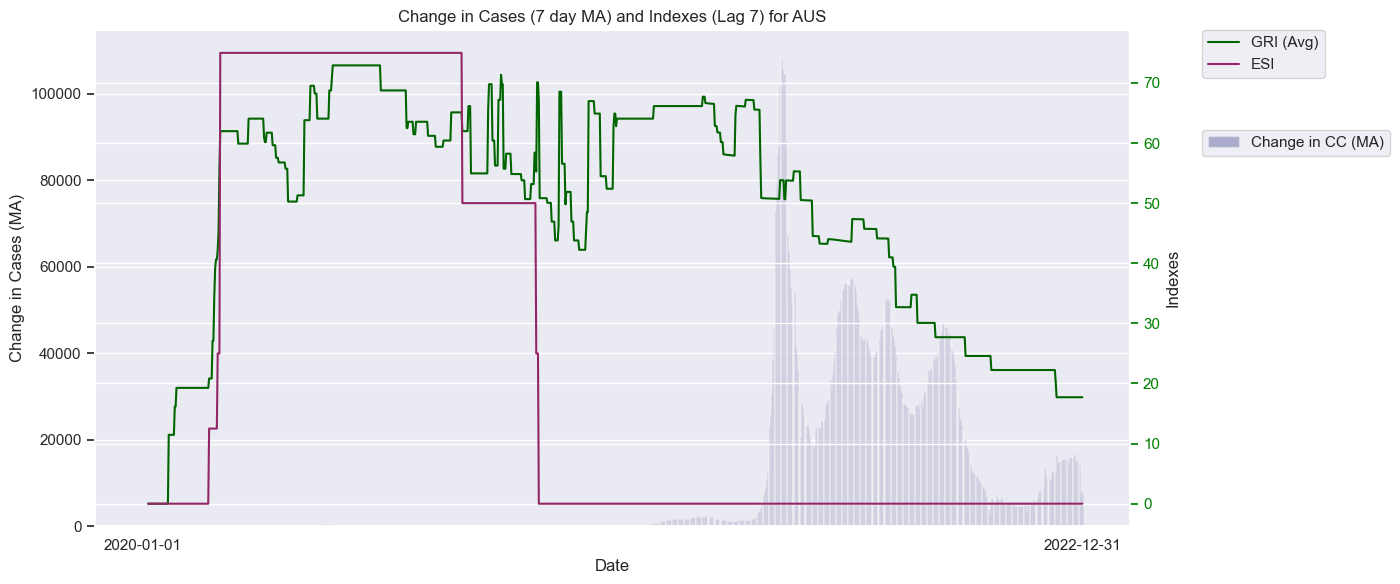

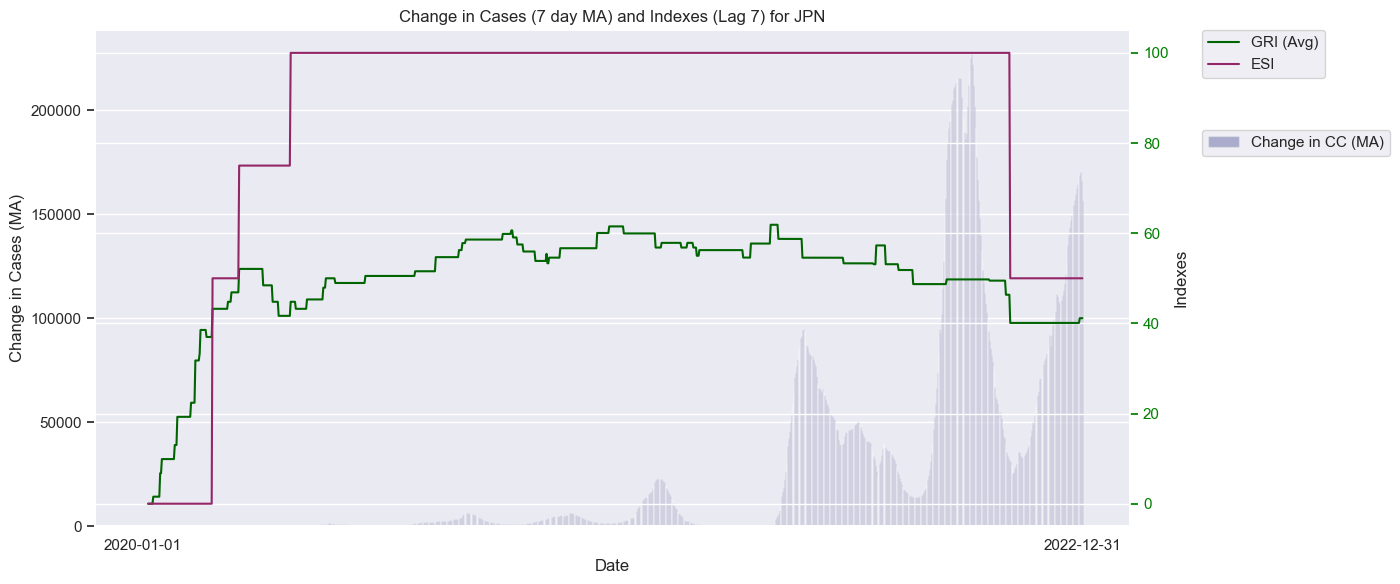

In [185]:
start_date = justViewingLagged['Date'].min()
end_date = justViewingLagged['Date'].max()

for idx, country in enumerate(countries):
    
    plt.figure(figsize=(14, 6))

    data = justViewingLagged[justViewing['CountryCode'] == country].sort_values(by='Date')

    ax1 = sns.barplot(x='Date', y='ChangeCC_7dayMA', data=data, color='#040080',zorder=1,alpha=0.3,label='Change in CC (MA)') 
    ax1.set_ylabel('Change in Cases (MA)')
    ax1.set_title(f'Change in Cases (7 day MA) and Indexes (Lag 7) for {country}')
    ax1.tick_params(axis='y', colors='#292929')

    ax2 = ax1.twinx()
    sns.lineplot(x='Date', y='GovernmentResponseIndex_Average_Lag7', data=data, ax=ax2, color='darkgreen', label='GRI (Avg)')
    sns.lineplot(x='Date', y='EconomicSupportIndex_Lag7', data=data, ax=ax2, color='#932667', label='ESI')
    ax2.set_ylabel('Indexes')
    ax2.tick_params(axis='y', colors='green')
   
    ax1.legend(loc='upper left', bbox_to_anchor=(1.07, 0.8), borderaxespad=0.)
    ax2.legend(loc='upper left', bbox_to_anchor=(1.07, 1), borderaxespad=0.)
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    plt.xticks([start_date, end_date])
    plt.tight_layout()
    plt.show()

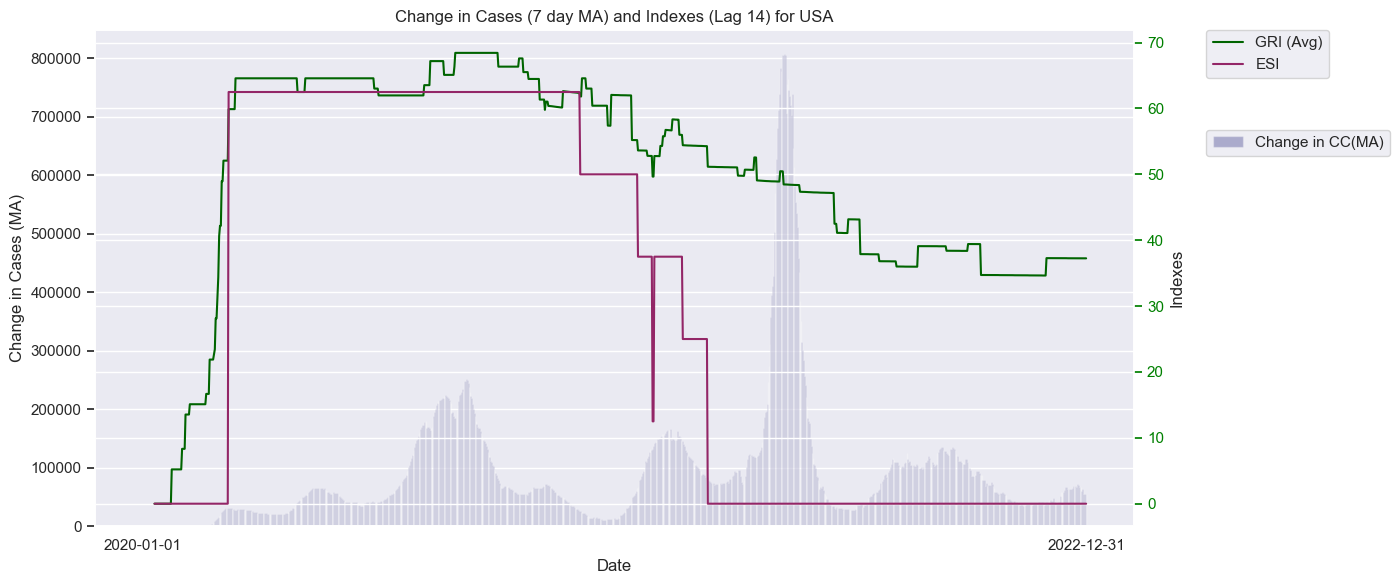

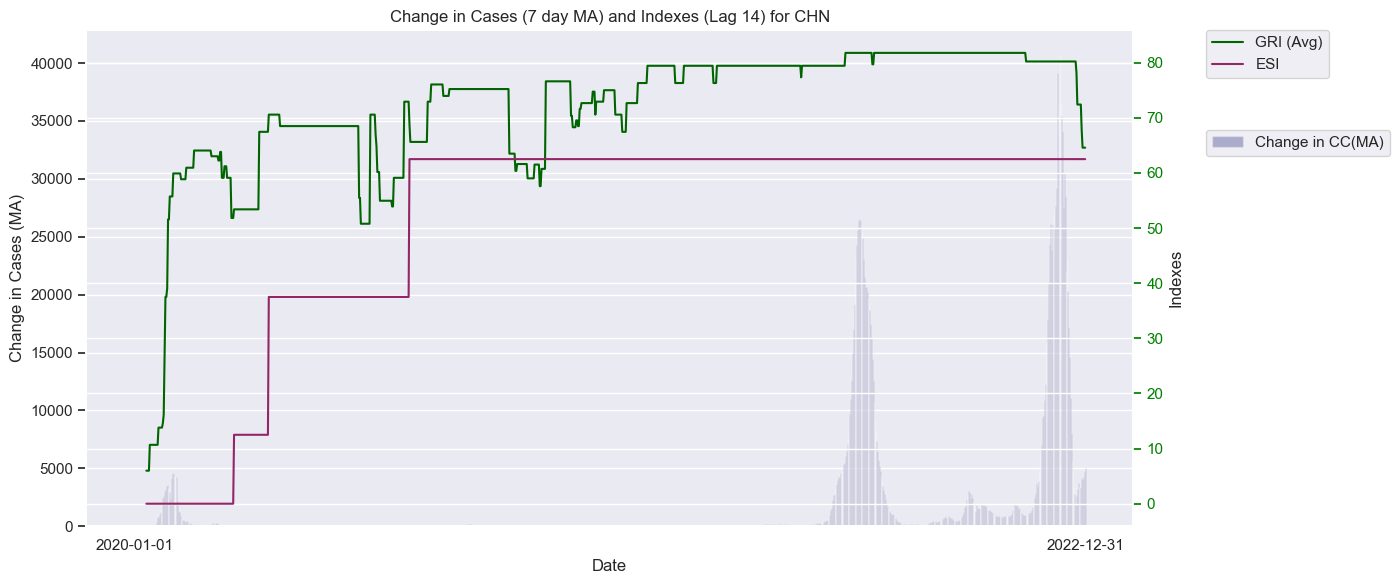

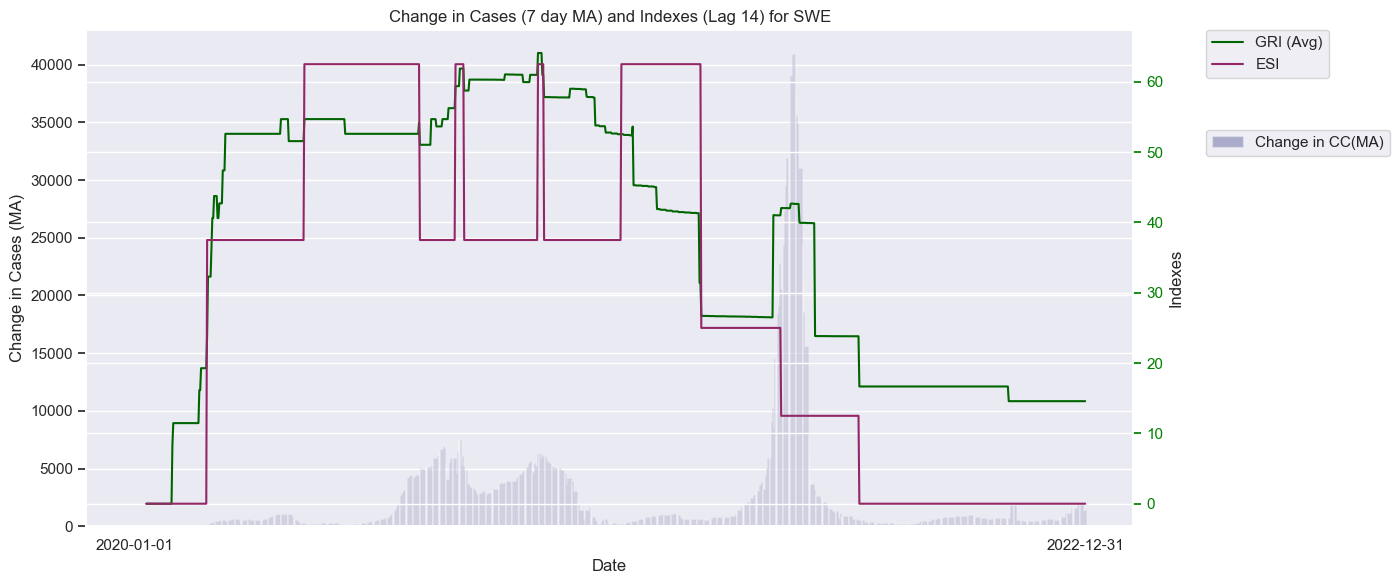

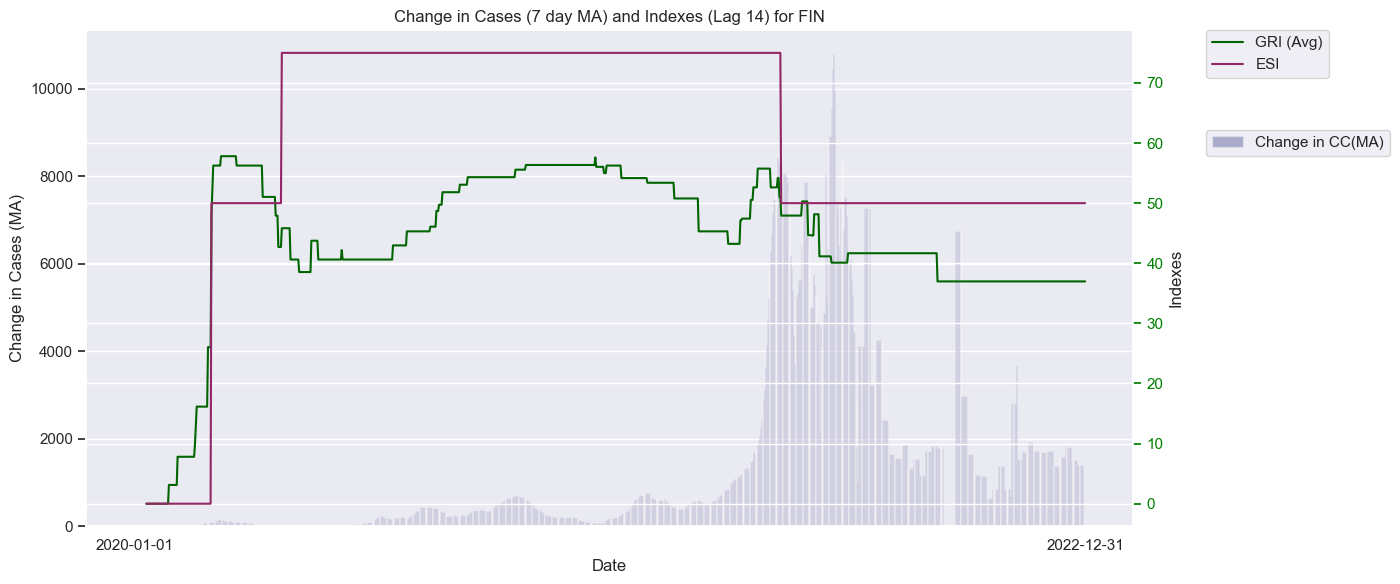

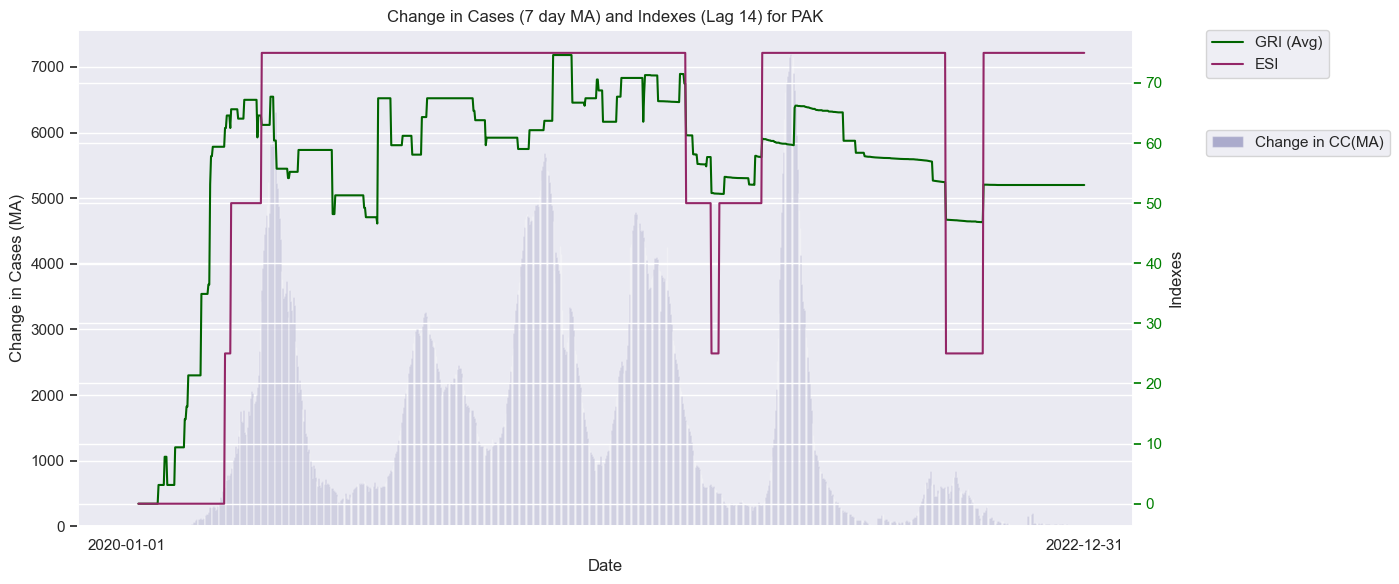

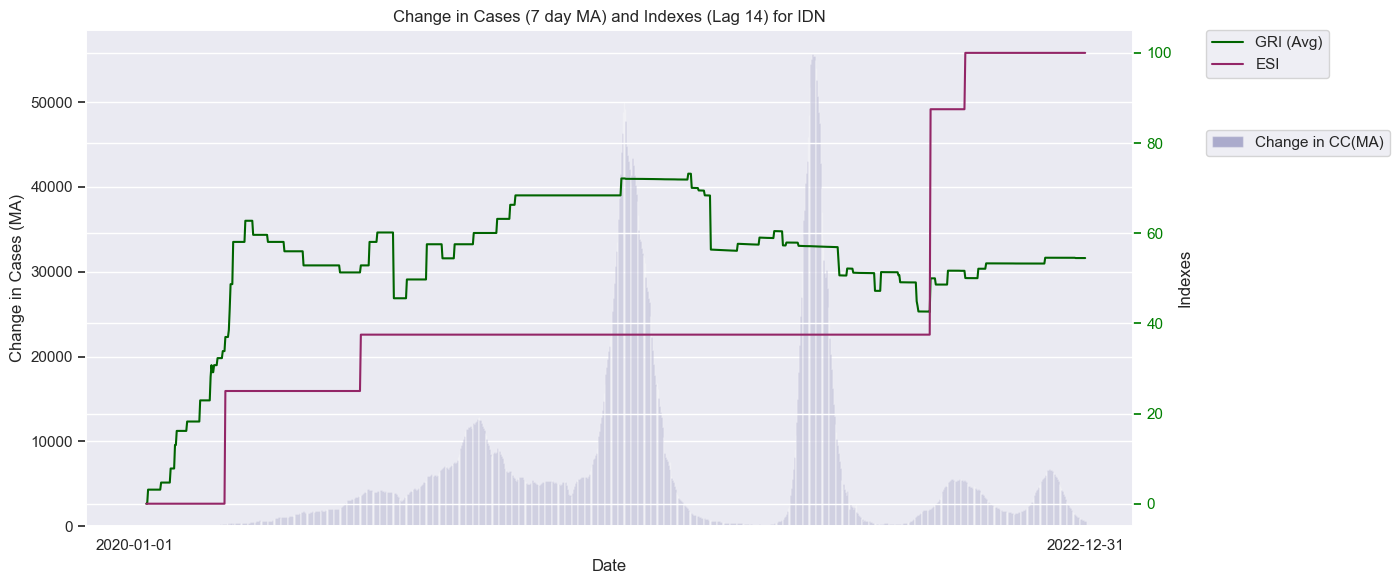

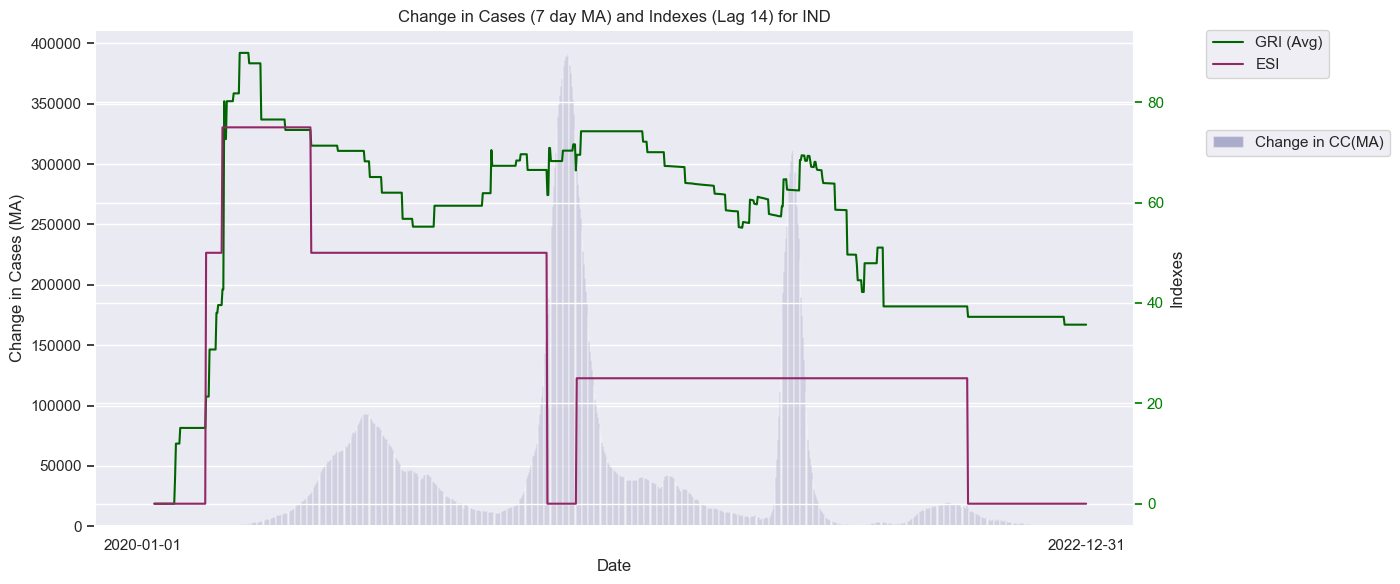

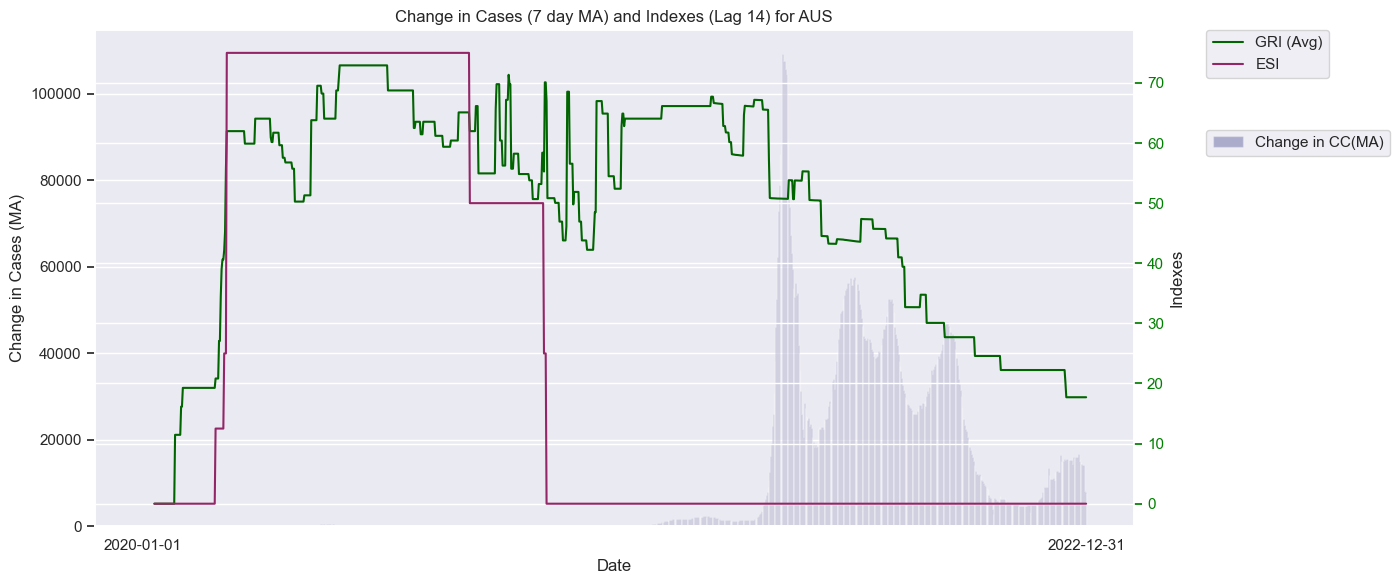

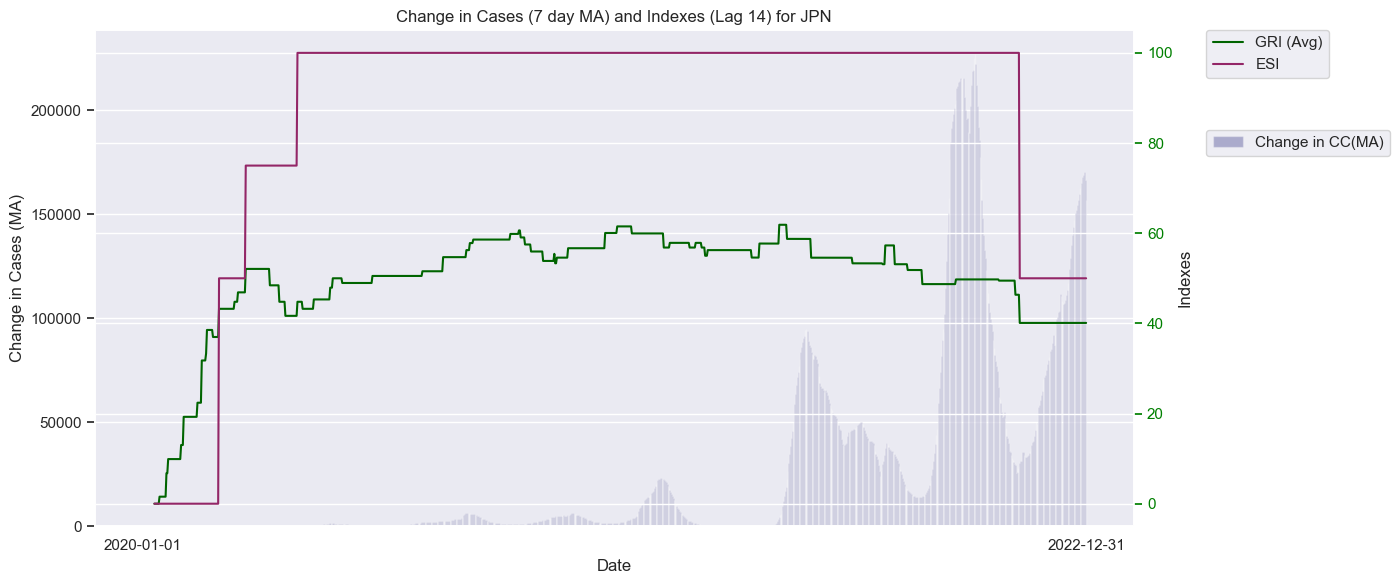

In [186]:
start_date = justViewingLagged['Date'].min()
end_date = justViewingLagged['Date'].max()

for idx, country in enumerate(countries):
    
    plt.figure(figsize=(14, 6))

    data = justViewingLagged[justViewing['CountryCode'] == country].sort_values(by='Date')

    ax1 = sns.barplot(x='Date', y='ChangeCC_7dayMA', data=data, color='#040080',zorder=1,alpha=0.3,label='Change in CC(MA)') 
    ax1.set_ylabel('Change in Cases (MA)')
    ax1.set_title(f'Change in Cases (7 day MA) and Indexes (Lag 14) for {country}')
    ax1.tick_params(axis='y', colors='#292929')

    ax2 = ax1.twinx()
    sns.lineplot(x='Date', y='GovernmentResponseIndex_Average_Lag14', data=data, ax=ax2, color='darkgreen', label='GRI (Avg)')
    sns.lineplot(x='Date', y='EconomicSupportIndex_Lag14', data=data, ax=ax2, color='#932667', label='ESI')
    ax2.set_ylabel('Indexes')
    ax2.tick_params(axis='y', colors='green')
   
    ax1.legend(loc='upper left', bbox_to_anchor=(1.07, 0.8), borderaxespad=0.)
    ax2.legend(loc='upper left', bbox_to_anchor=(1.07, 1), borderaxespad=0.)
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    plt.xticks([start_date, end_date])
    plt.tight_layout()
    plt.show()

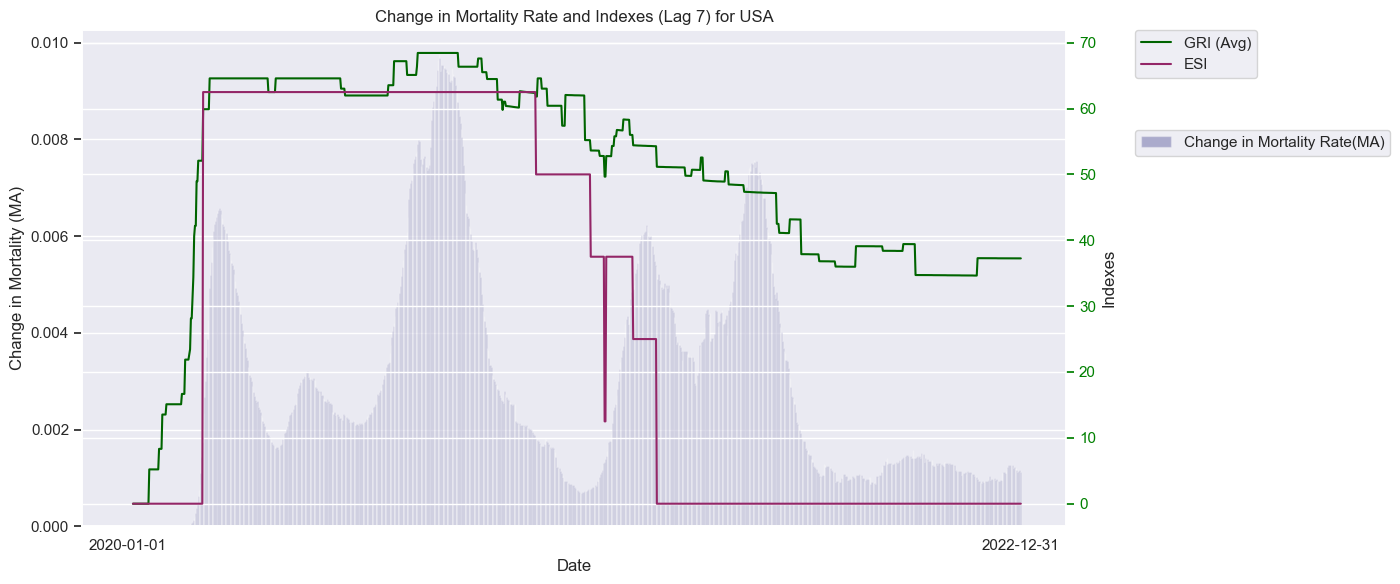

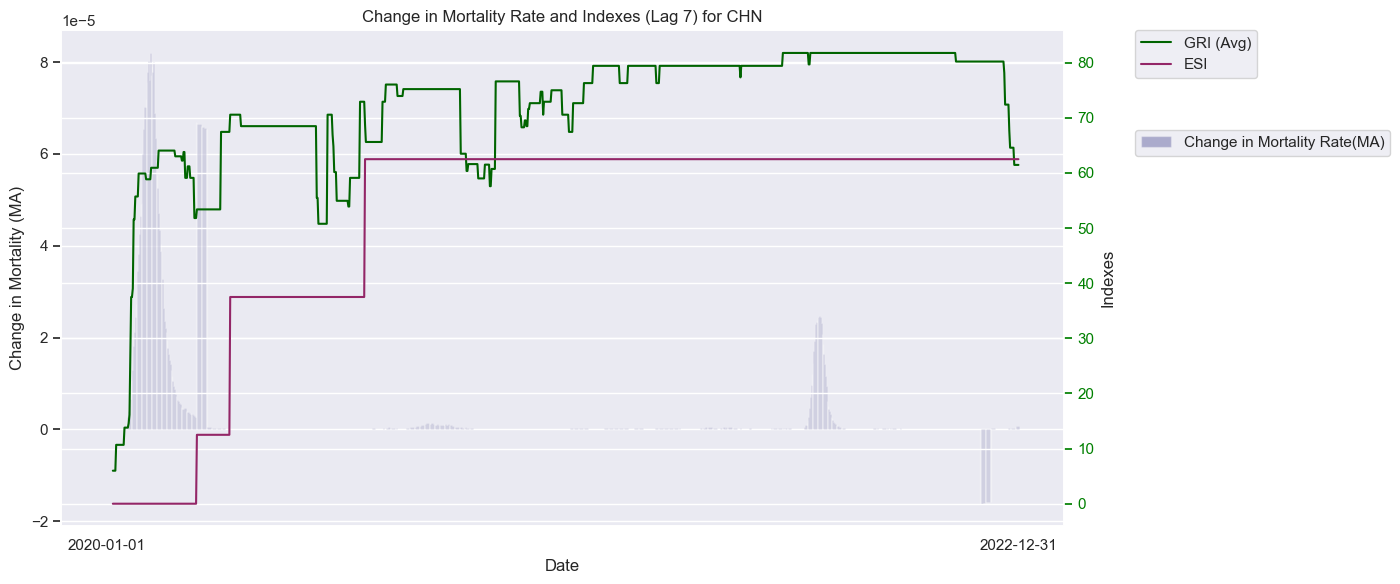

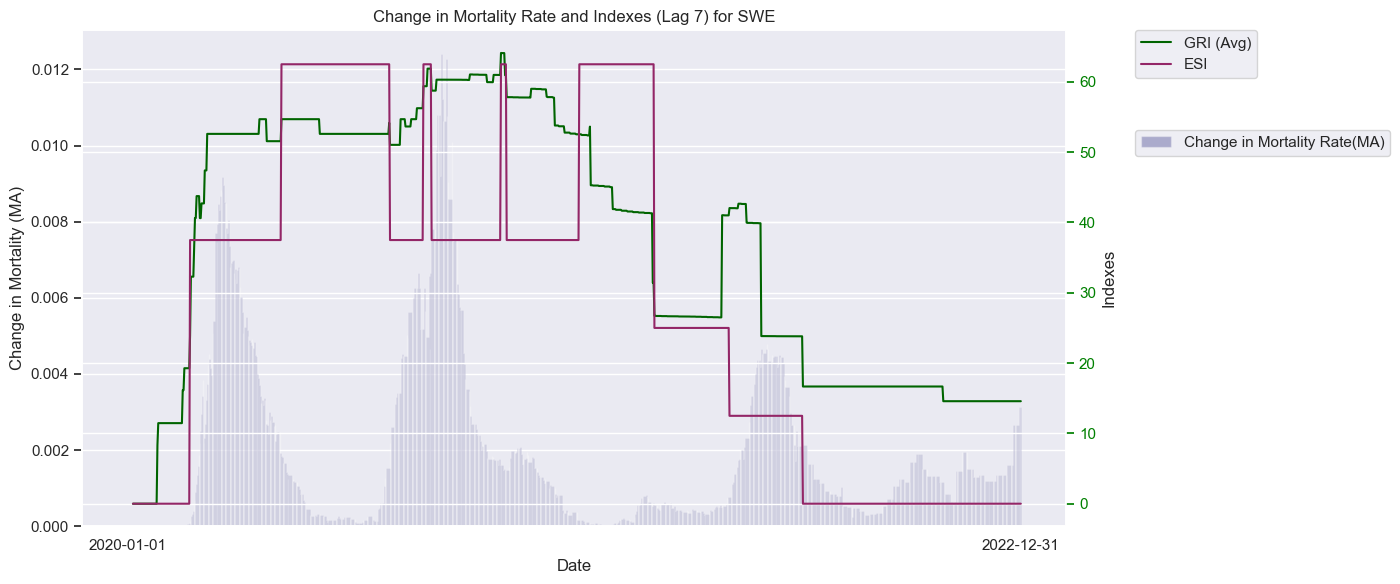

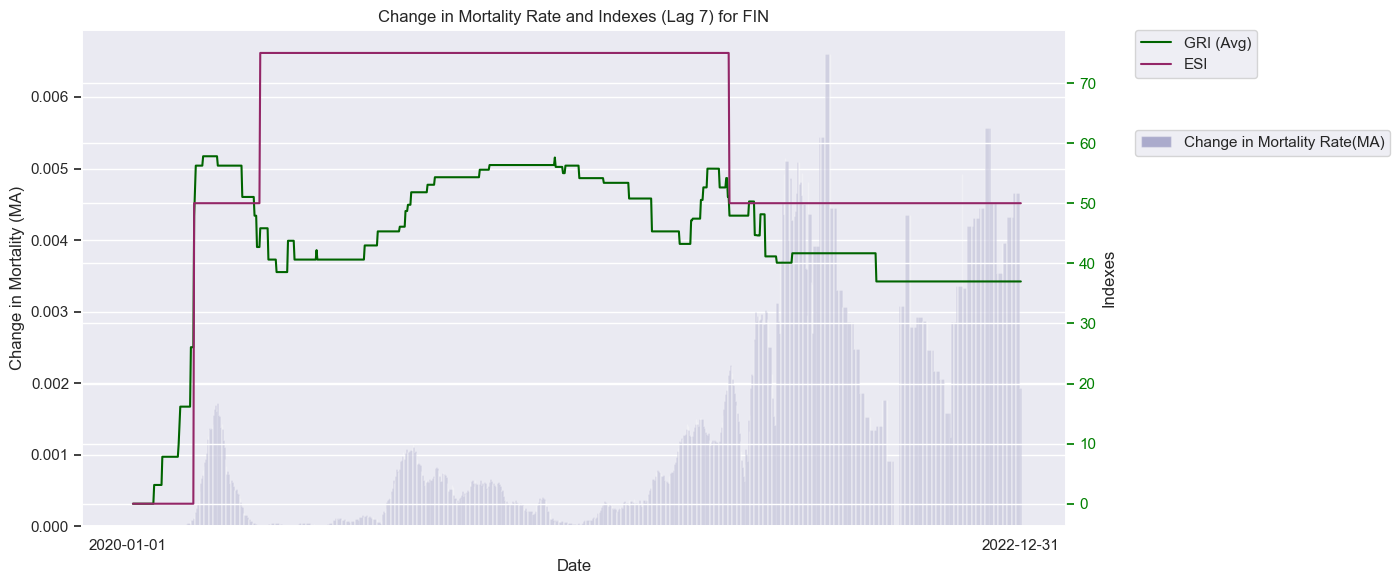

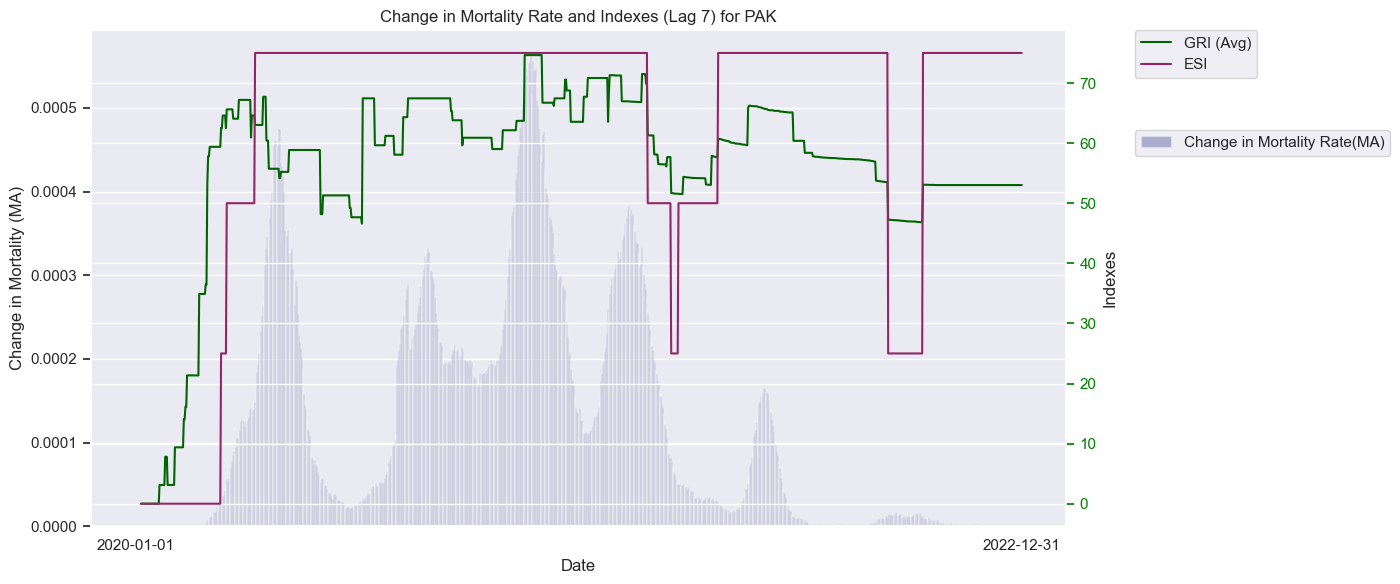

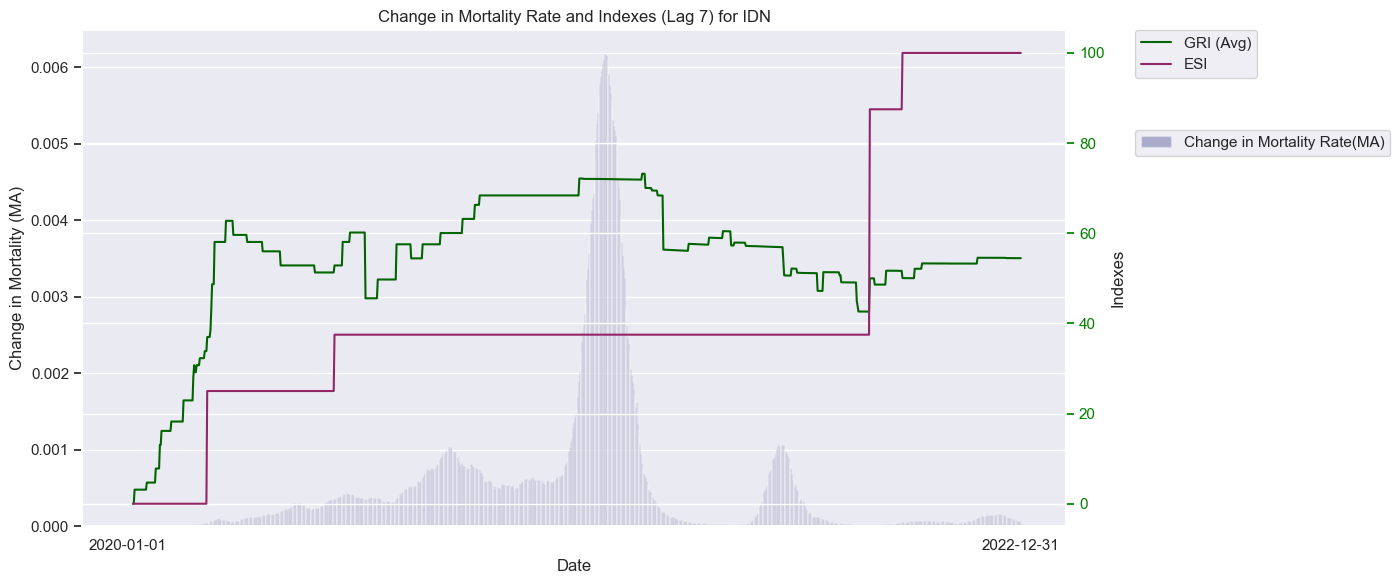

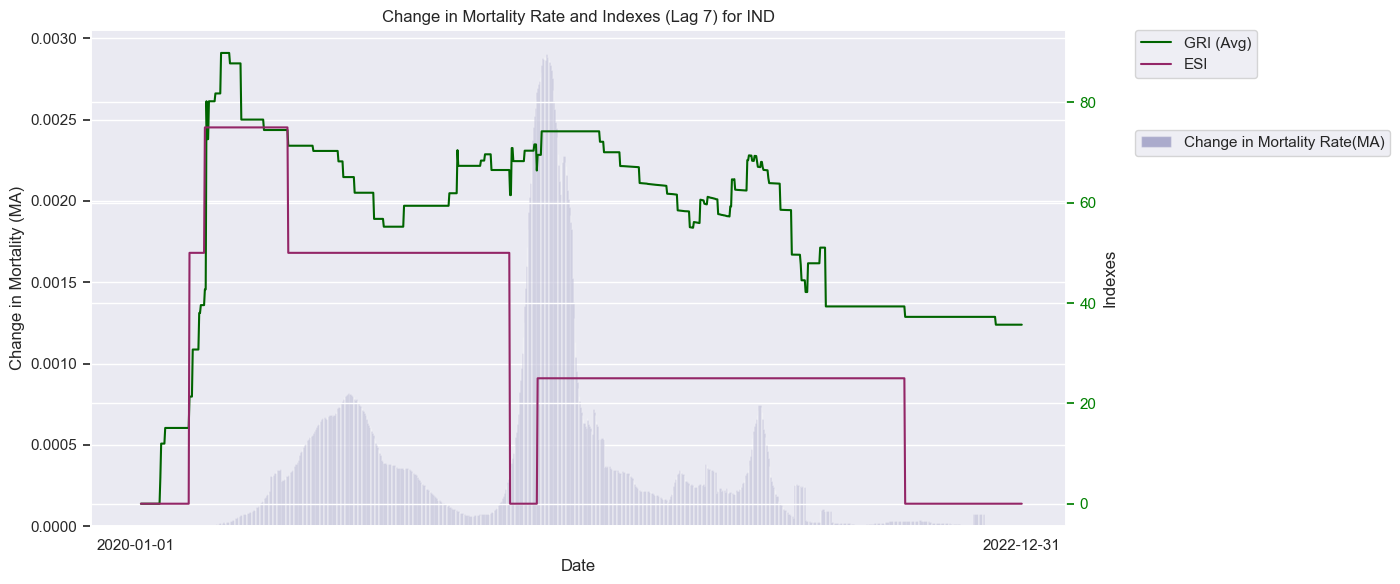

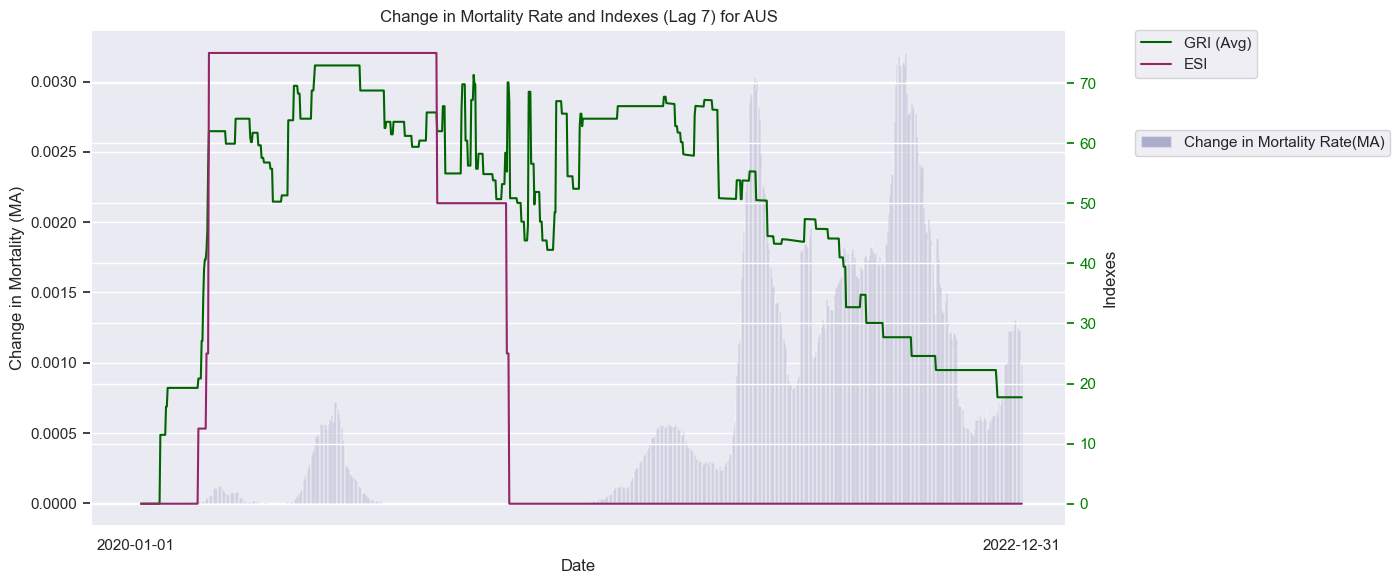

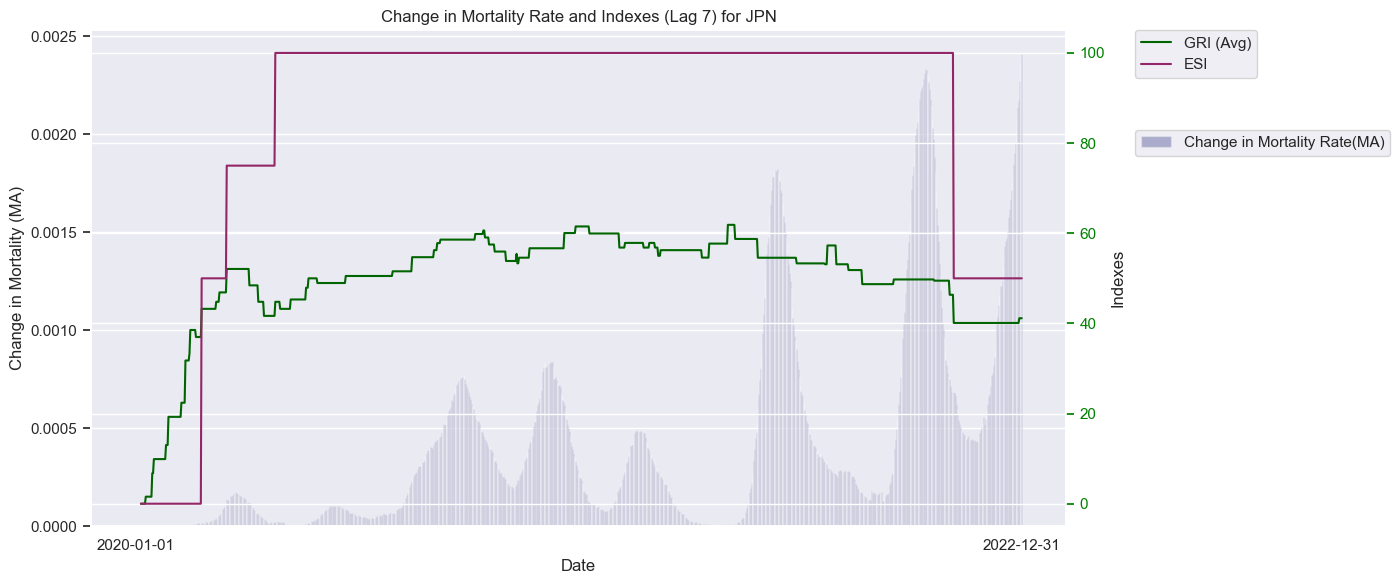

In [187]:
start_date = justViewingLagged['Date'].min()
end_date = justViewingLagged['Date'].max()

for idx, country in enumerate(countries):
    
    plt.figure(figsize=(14, 6))

    data = justViewingLagged[justViewing['CountryCode'] == country].sort_values(by='Date')

    ax1 = sns.barplot(x='Date', y='ChangeMR_14dayMA', data=data, color='#040080',zorder=1,alpha=0.3,label='Change in Mortality Rate(MA)') 
    ax1.set_ylabel('Change in Mortality (MA)')
    ax1.set_title(f'Change in Mortality Rate and Indexes (Lag 7) for {country}')
    ax1.tick_params(axis='y', colors='#292929')

    ax2 = ax1.twinx()
    sns.lineplot(x='Date', y='GovernmentResponseIndex_Average_Lag7', data=data, ax=ax2, color='darkgreen', label='GRI (Avg)')
    sns.lineplot(x='Date', y='EconomicSupportIndex_Lag7', data=data, ax=ax2, color='#932667', label='ESI')
    ax2.set_ylabel('Indexes')
    ax2.tick_params(axis='y', colors='green')
   
    ax1.legend(loc='upper left', bbox_to_anchor=(1.07, 0.8), borderaxespad=0.)
    ax2.legend(loc='upper left', bbox_to_anchor=(1.07, 1), borderaxespad=0.)
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    plt.xticks([start_date, end_date])
    plt.tight_layout()
    plt.show()

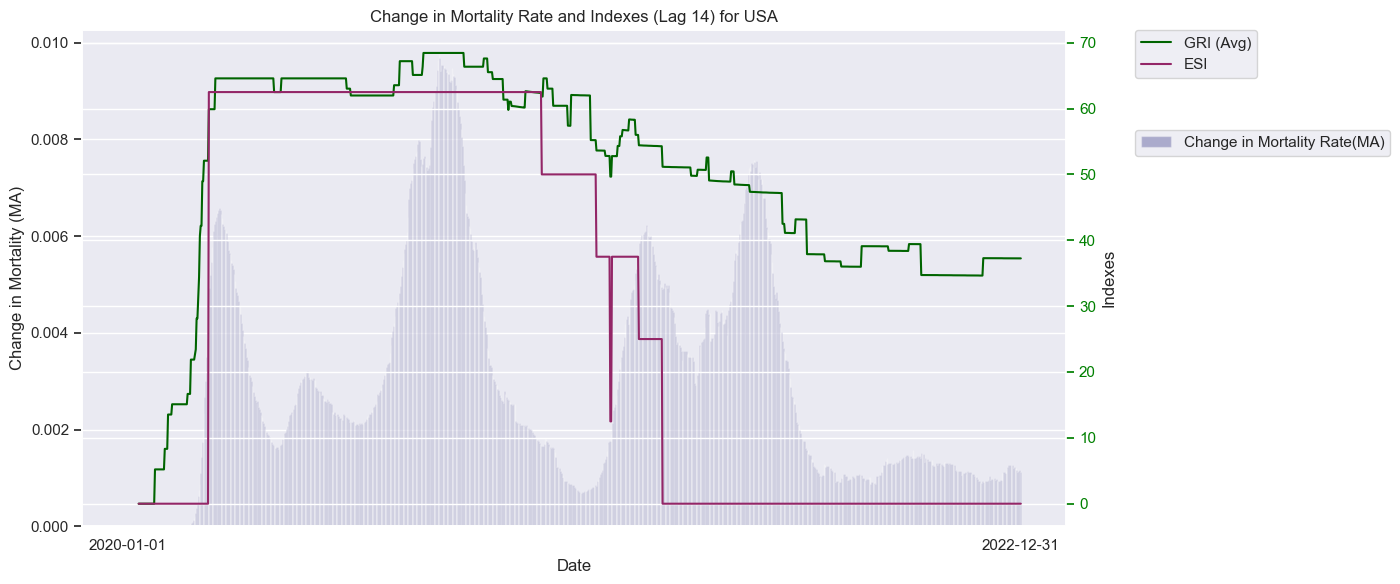

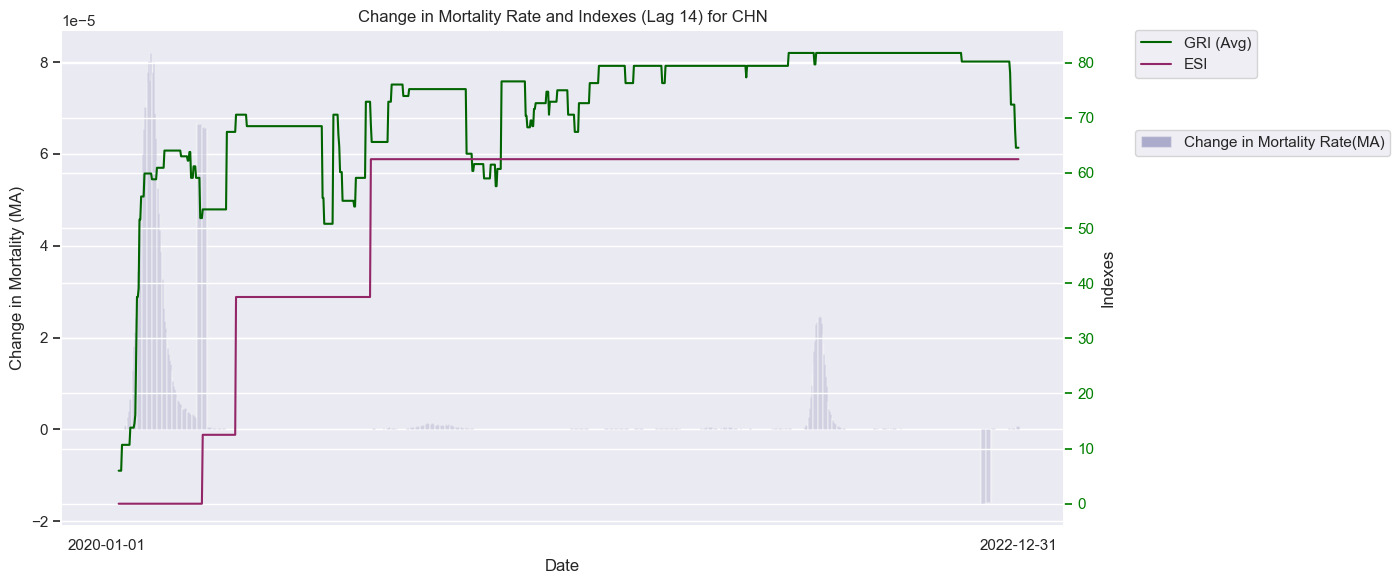

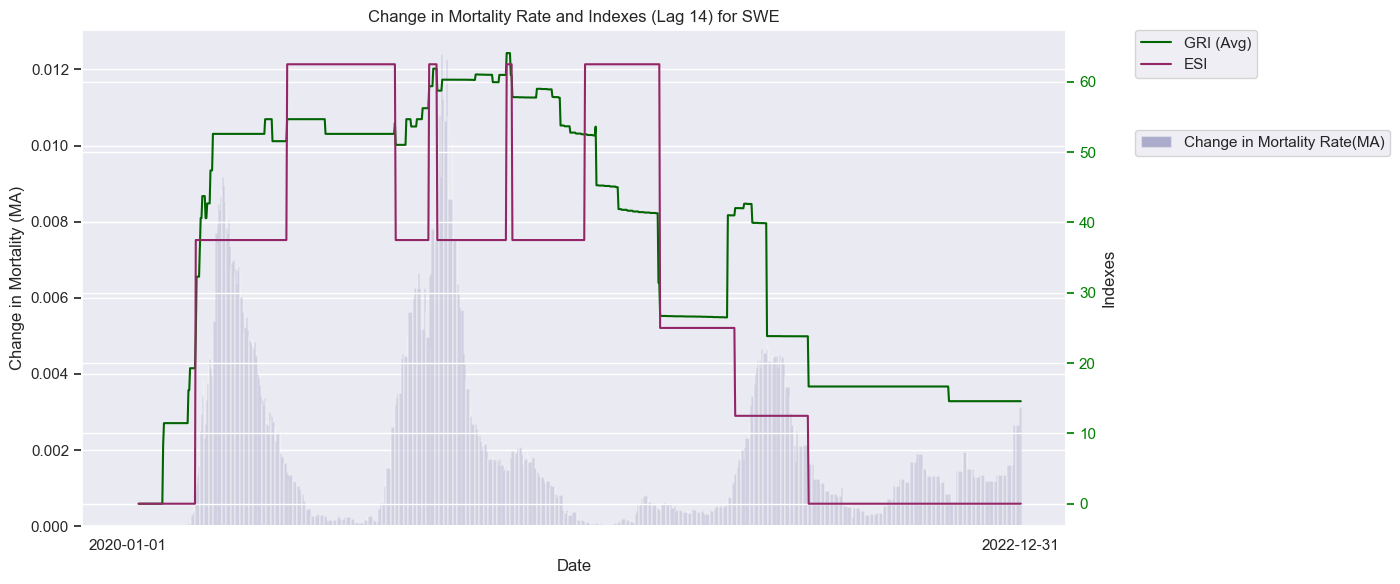

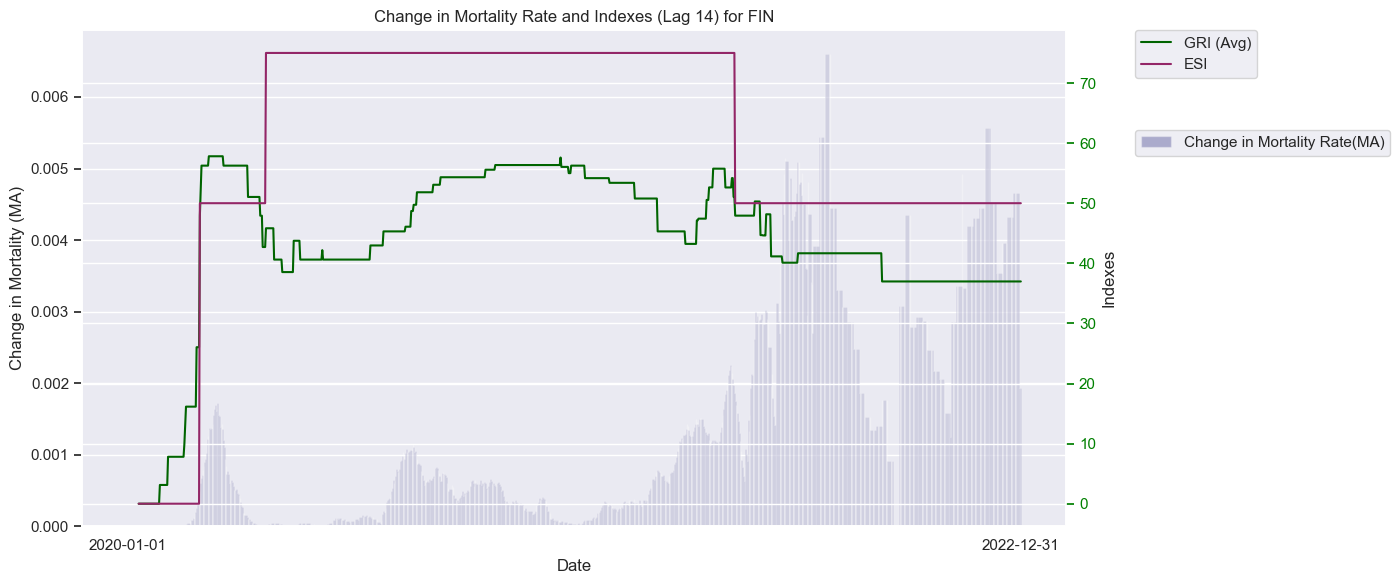

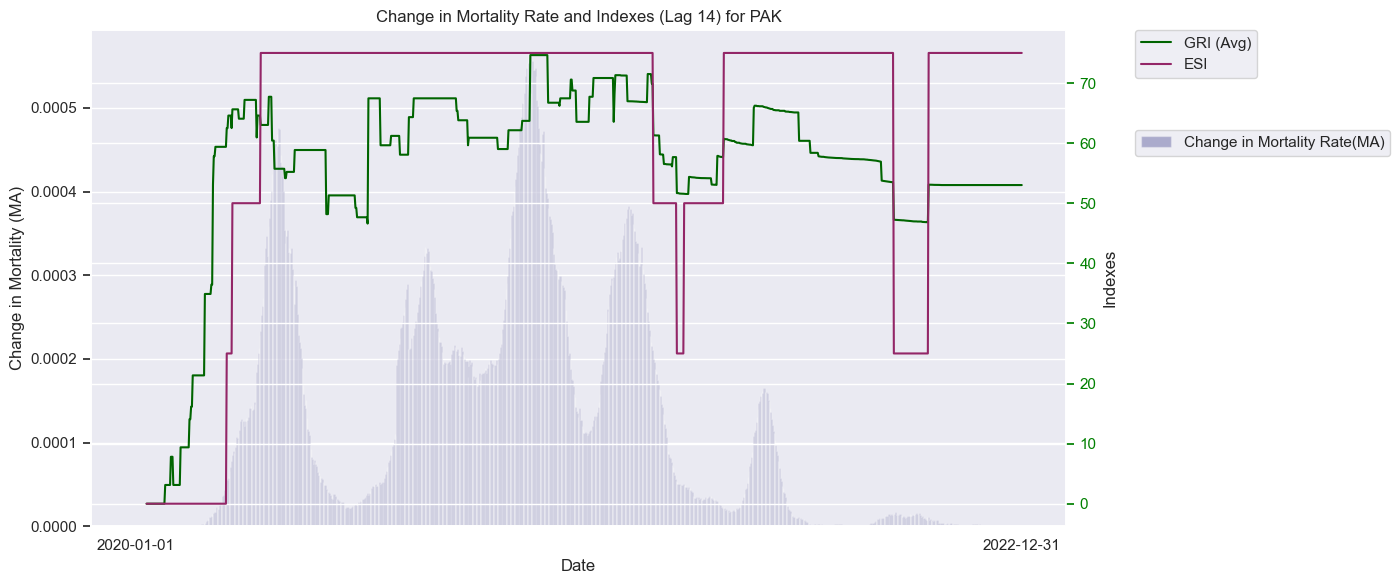

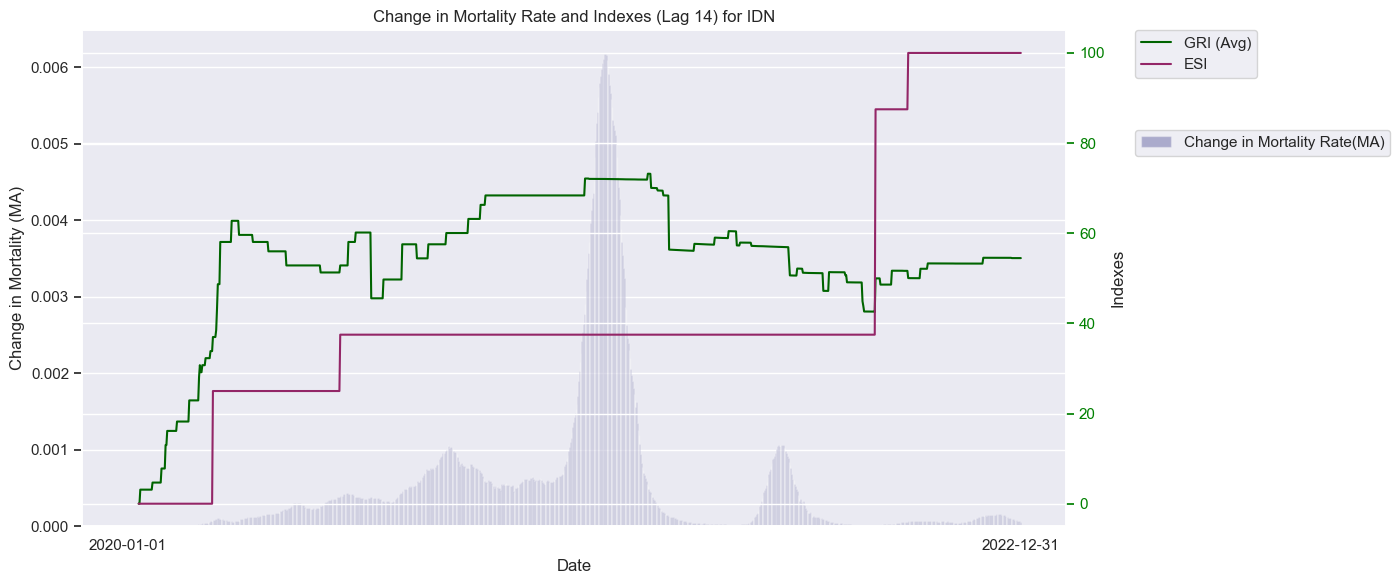

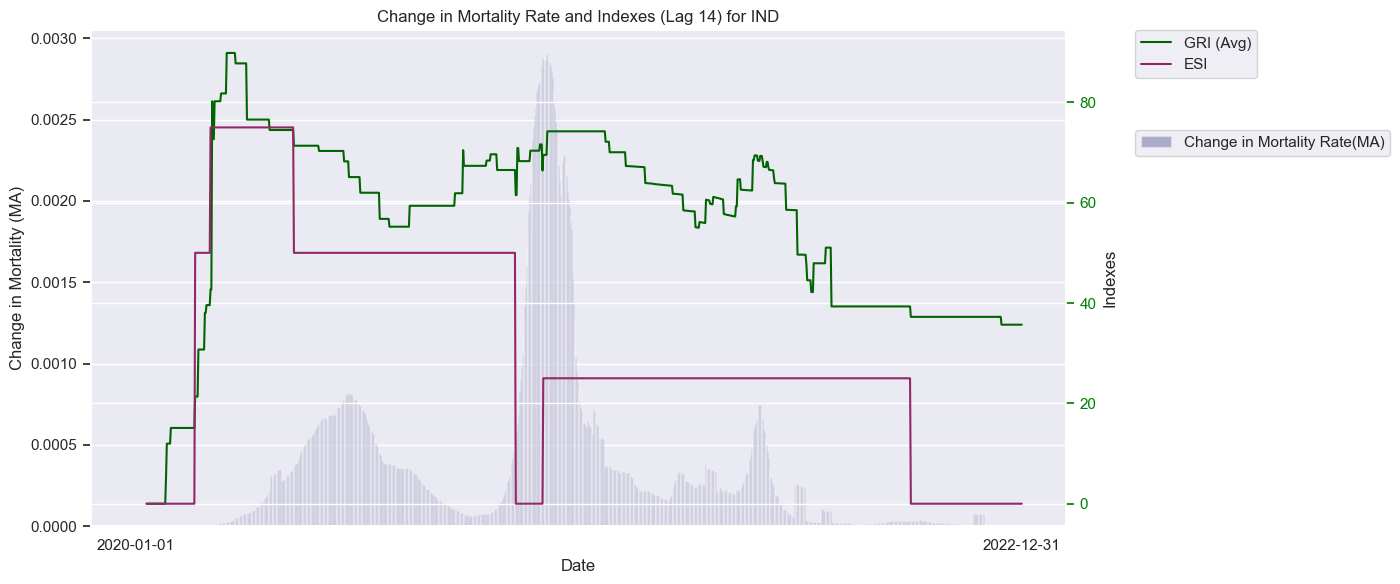

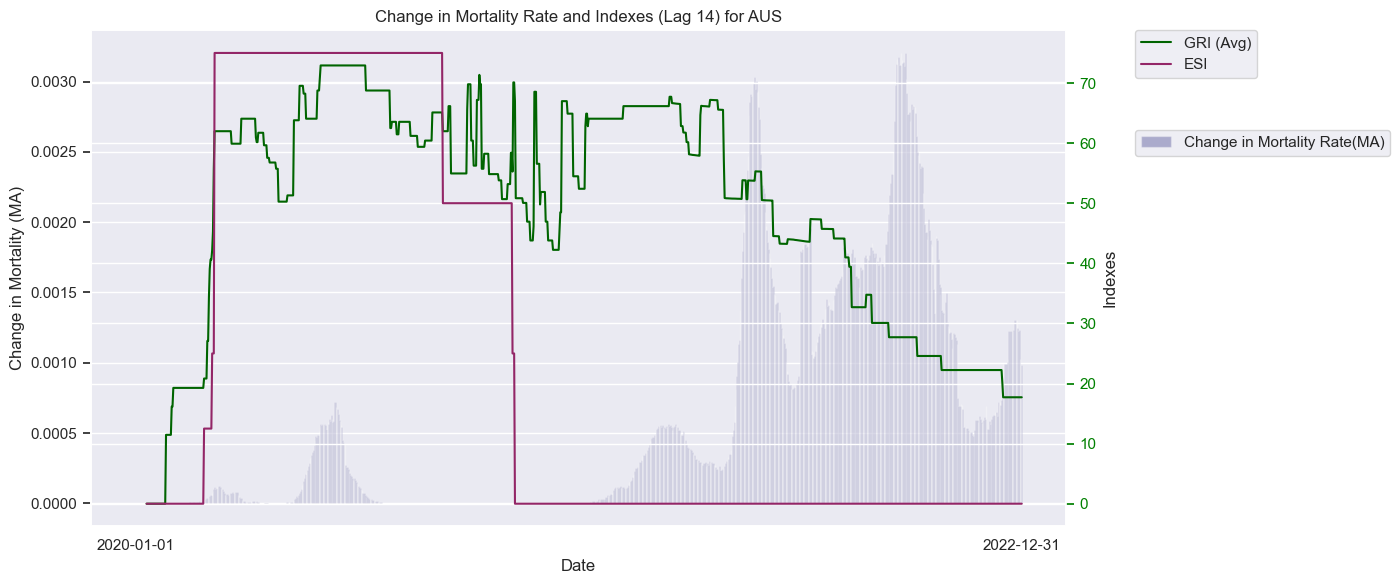

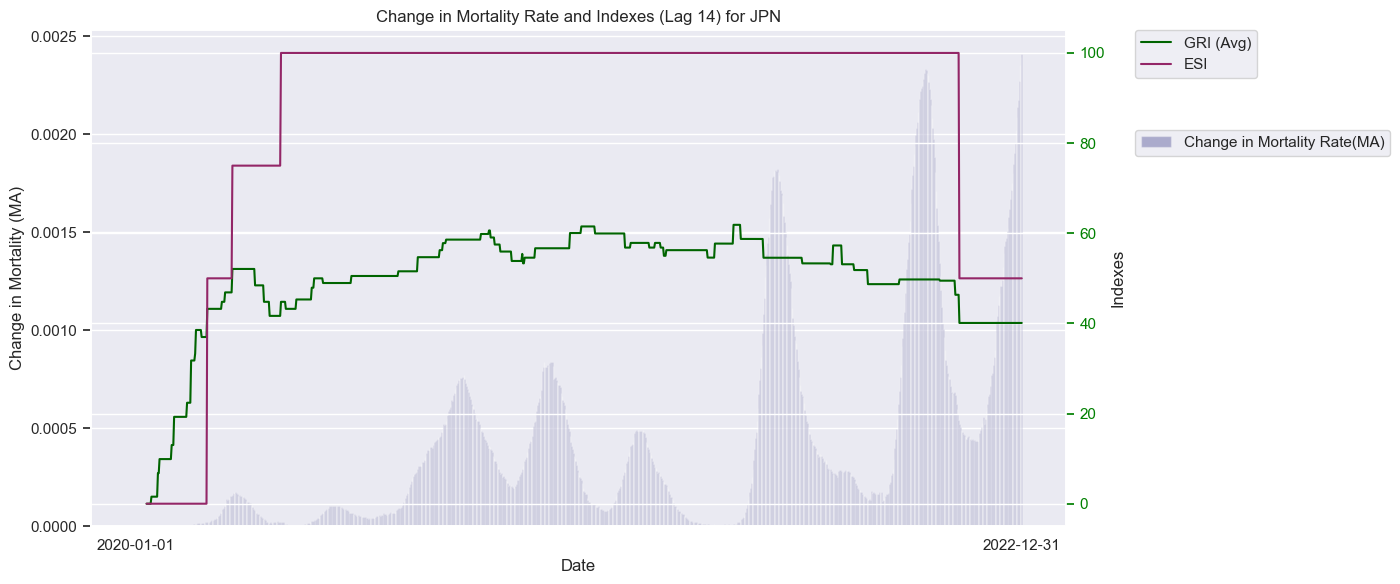

In [188]:
start_date = justViewingLagged['Date'].min()
end_date = justViewingLagged['Date'].max()

for idx, country in enumerate(countries):
    
    plt.figure(figsize=(14, 6))

    data = justViewingLagged[justViewing['CountryCode'] == country].sort_values(by='Date')

    ax1 = sns.barplot(x='Date', y='ChangeMR_14dayMA', data=data, color='#040080',zorder=1,alpha=0.3,label='Change in Mortality Rate(MA)') 
    ax1.set_ylabel('Change in Mortality (MA)')
    ax1.set_title(f'Change in Mortality Rate and Indexes (Lag 14) for {country}')
    ax1.tick_params(axis='y', colors='#292929')

    ax2 = ax1.twinx()
    sns.lineplot(x='Date', y='GovernmentResponseIndex_Average_Lag14', data=data, ax=ax2, color='darkgreen', label='GRI (Avg)')
    sns.lineplot(x='Date', y='EconomicSupportIndex_Lag14', data=data, ax=ax2, color='#932667', label='ESI')
    ax2.set_ylabel('Indexes')
    ax2.tick_params(axis='y', colors='green')
   
    ax1.legend(loc='upper left', bbox_to_anchor=(1.07, 0.8), borderaxespad=0.)
    ax2.legend(loc='upper left', bbox_to_anchor=(1.07, 1), borderaxespad=0.)
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    plt.xticks([start_date, end_date])
    plt.tight_layout()
    plt.show()

#### Plot GRI with its lagged values for any one country

#### Drop China

#### Create new features for every country

* Change in MR MA (14), CC MA (7)
* Include all lagged features for all intervals


### Imputing values

In [125]:
df = df.replace(np.nan, 0)

### Distribution of dataset by Country

In [128]:
df.shape

(164400, 21)

164400 / 1096 = 150, which is the number of countries in our dataset. 

In [131]:
size = df.groupby('CountryCode').size()
size.nunique()

1

### Label Encode Majority Vaccinated

### Correlation Matrix (incorrect right now_)

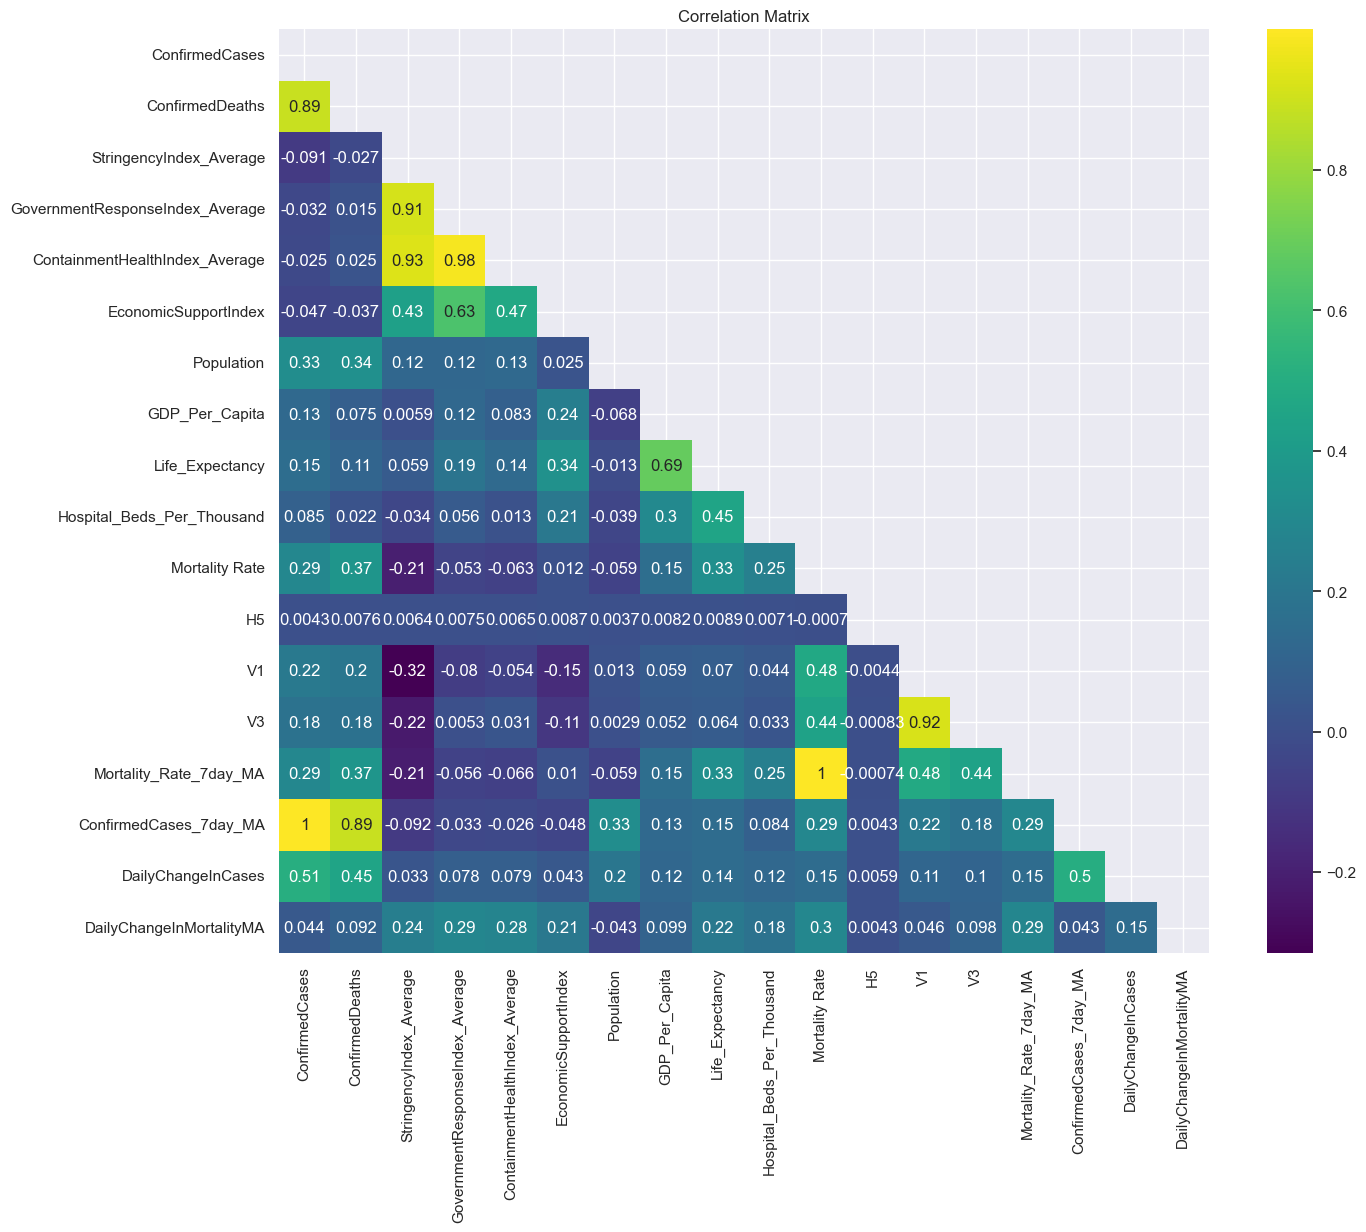

In [126]:
corr_matrix = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, mask=mask, cmap='viridis', annot=True) 
plt.title('Correlation Matrix')
plt.show()